
# FRA Project


## Part A


## Problem Statement 

Context
In the realm of modern finance, businesses encounter the perpetual challenge of managing debt obligations effectively to maintain a favorable credit standing and foster sustainable growth. Investors keenly scrutinize companies capable of navigating financial complexities while ensuring stability and profitability. A pivotal instrument in this evaluation process is the balance sheet, which provides a comprehensive overview of a company's assets, liabilities, and shareholder equity, offering insights into its financial health and operational efficiency. In this context, leveraging available financial data, particularly from preceding fiscal periods, becomes imperative for informed decision-making and strategic planning.

 

#### Objective
A group of venture capitalists want to develop a Financial Health Assessment Tool. With the help of the tool, it endeavors to empower businesses and investors with a robust mechanism for evaluating the financial well-being and creditworthiness of companies. By harnessing machine learning techniques, they aim to analyze historical financial statements and extract pertinent insights to facilitate informed decision-making via the tool. Specifically, they foresee facilitating the following with the help of the tool:

Debt Management Analysis: Identify patterns and trends in debt management practices to assess the ability of businesses to fulfill financial obligations promptly and efficiently, and identify potential cases of default.
Credit Risk Evaluation: Evaluate credit risk exposure by analyzing liquidity ratios, debt-to-equity ratios, and other key financial indicators to ascertain the likelihood of default and inform investment decisions.
They have hired you as a data scientist and provided you with the financial metrics of different companies. The task is to analyze the data provided and develop a predictive model leveraging machine learning techniques to identify whether a given company will be tagged as a defaulter in terms of net worth next year. The predictive model will help the organization anticipate potential challenges with the financial performance of the companies and enable proactive risk mitigation strategies.

 

#### Data Dictionary
The data consists of financial metrics from the balance sheets of different companies. The detailed data dictionary is given below.





- **Networth Next Year**: Net worth of the customer in the next year
- **Total assets**: Total assets of customer
- **Net worth**: Net worth of the customer of the present year
- **Total income**: Total income of the customer
- **Change in stock**: Difference between the current value of the stock and the value of stock in the last trading day
- **Total expenses**: Total expenses done by the customer
- **Profit after tax**: Profit after tax deduction
- **PBDITA**: Profit before depreciation, income tax, and amortization
- **PBT**: Profit before tax deduction
- **Cash profit**: Total Cash profit
- **PBDITA as % of total income**: PBDITA / Total income
- **PBT as % of total income**: PBT / Total income
- **PAT as % of total income**: PAT / Total income
- **Cash profit as % of total income**: Cash Profit / Total income
- **PAT as % of net worth**: PAT / Net worth
- **Sales**: Sales done by the customer
- **Income from financial services**: Income from financial services
- **Other income**: Income from other sources
- **Total capital**: Total capital of the customer
- **Reserves and funds**: Total reserves and funds of the customer
- **Borrowings**: Total amount borrowed by the customer
- **Current liabilities & provisions**: current liabilities of the customer
- **Deferred tax liability**: Future income tax customer will pay because of the current transaction
- **Shareholders funds**: Amount of equity in a company which belongs to shareholders
- **Cumulative retained profits**: Total cumulative profit retained by customer
- **Capital employed**: Current asset minus current liabilities
- **TOL/TNW**: Total liabilities of the customer divided by Total net worth
- **Total term liabilities / tangible net worth**: Short + long term liabilities divided by tangible net worth
- **Contingent liabilities / Net worth (%)**: Contingent liabilities / Net worth
- **Contingent liabilities**: Liabilities because of uncertain events
- **Net fixed assets**: The purchase price of all fixed assets
- **Investments**: Total invested amount
- **Current assets**: Assets that are expected to be converted to cash within a year
- **Net working capital**: Difference between the current liabilities and current assets
- **Quick ratio (times)**: Total cash divided by current liabilities
- **Current ratio (times)**: Current assets divided by current liabilities
- **Debt to equity ratio (times)**: Total liabilities divided by its shareholder equity
- **Cash to current liabilities (times)**: Total liquid cash divided by current liabilities
- **Cash to average cost of sales per day**: Total cash divided by the average cost of the sales
- **Creditors turnover**: Net credit purchase divided by average trade creditors
- **Debtors turnover**: Net credit sales divided by average accounts receivable
- **Finished goods turnover**: Annual sales divided by average inventory
- **WIP turnover**: The cost of goods sold for a period divided by the average inventory for that period
- **Raw material turnover**: Cost of goods sold is divided by the average inventory for the same period
- **Shares outstanding**: Number of issued shares minus the number of shares held in the company
- **Equity face value**: cost of the equity at the time of issuing
- **EPS**: Net income divided by the total number of outstanding share
- **Adjusted EPS**: Adjusted net earnings divided by the weighted average number of common shares outstanding on a diluted basis during the plan year
- **Total liabilities**: Sum of all types of liabilities
- **PE on BSE**: Company's current stock price divided by its earnings per share


## 1: Define the problem and perform Exploratory Data Analysis
- Problem definition - Check shape, Data types, and statistical summary - Univariate analysis - Multivariate analysis - Use appropriate visualizations to identify the patterns and insights - Key meaningful observations on individual variables and the relationship between variables


In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
#READ DATA FILE
df=pd.read_csv("Company%28FRA%29.csv")

In [3]:
#FIRST 5 ROWS
df.head()

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
0,1,395.3,827.6,336.5,534.1,13.5,508.7,38.9,124.4,64.6,...,5.65,3.99,3.37,14.87,8760056.0,10.0,4.44,4.44,827.6,NaN
1,2,36.2,67.7,24.3,137.9,-3.7,131.0,3.2,5.5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.7,NaN
2,3,84.0,238.4,78.9,331.2,-18.1,309.2,3.9,25.8,10.5,...,2.51,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.4,NaN
3,4,2041.4,6883.5,1443.3,8448.5,212.2,8482.4,178.3,418.4,185.1,...,1.91,18.14,18.62,11.11,10000000.0,10.0,17.60,17.60,6883.5,NaN
4,5,41.8,90.9,47.0,388.6,3.4,392.7,-0.7,7.2,-0.6,...,68.00,45.87,28.67,19.93,107315.0,100.0,-6.52,-6.52,90.9,NaN


In [4]:
# Check the shape of the dataset
df.shape


(4256, 51)

4256 rows, 51 columns

In [5]:
#Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Num                                          4256 non-null   int64  
 1   Networth Next Year                           4256 non-null   float64
 2   Total assets                                 4256 non-null   float64
 3   Net worth                                    4256 non-null   float64
 4   Total income                                 4025 non-null   float64
 5   Change in stock                              3706 non-null   float64
 6   Total expenses                               4091 non-null   float64
 7   Profit after tax                             4102 non-null   float64
 8   PBDITA                                       4102 non-null   float64
 9   PBT                                          4102 non-null   float64
 10  

50 float data type,1 integer data type

In [6]:
#statistical summary
df.describe()

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
count,4256.000000,4256.000000,4.256000e+03,4256.000000,4.025000e+03,3706.000000,4.091000e+03,4102.000000,4102.000000,4102.000000,...,3871.000000,3382.000000,3492.000000,3828.000000,3.446000e+03,3446.000000,4256.000000,4256.000000,4.256000e+03,1629.000000
mean,2128.500000,1344.740883,3.573617e+03,1351.949601,4.688190e+03,43.702482,4.356301e+03,295.050585,605.940639,410.259044,...,17.929029,84.369988,28.684513,17.733926,2.376491e+07,-1094.828671,-196.217467,-197.527608,3.573617e+03,55.462290
std,1228.745702,15936.743168,3.007444e+04,12961.311651,5.391895e+04,436.915048,5.139809e+04,3079.902071,5646.230633,4217.415307,...,90.164435,562.637359,169.650915,343.125864,1.709790e+08,34101.358644,13061.953425,13061.929512,3.007444e+04,1304.445296
min,1.000000,-74265.600000,1.000000e-01,0.000000,0.000000e+00,-3029.400000,-1.000000e-01,-3908.300000,-440.700000,-3894.800000,...,0.000000,-0.090000,-0.180000,-2.000000,-2.147484e+09,-999998.900000,-843181.820000,-843181.820000,1.000000e-01,-1116.640000
25%,1064.750000,3.975000,9.130000e+01,31.475000,1.071000e+02,-1.800000,9.680000e+01,0.500000,6.925000,0.800000,...,3.810000,8.190000,5.100000,3.020000,1.308382e+06,10.000000,0.000000,0.000000,9.130000e+01,2.970000
50%,2128.500000,72.100000,3.155000e+02,104.800000,4.551000e+02,1.600000,4.268000e+02,9.000000,36.900000,12.600000,...,6.470000,17.320000,9.860000,6.410000,4.750000e+06,10.000000,1.490000,1.240000,3.155000e+02,8.690000
75%,3192.250000,330.825000,1.120800e+03,389.850000,1.485000e+03,18.400000,1.395700e+03,53.300000,158.700000,74.175000,...,11.850000,40.012500,20.240000,11.822500,1.090602e+07,10.000000,10.000000,7.615000,1.120800e+03,17.000000
max,4256.000000,805773.400000,1.176509e+06,613151.600000,2.442828e+06,14185.500000,2.366035e+06,119439.100000,208576.500000,145292.600000,...,3135.200000,17947.600000,5651.400000,21092.000000,4.130401e+09,100000.000000,34522.530000,34522.530000,1.176509e+06,51002.740000


In [7]:
pd.options.display.float_format = '{:.2f}'.format

df.describe()

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
count,4256.00,4256.00,4256.00,4256.00,4025.00,3706.00,4091.00,4102.00,4102.00,4102.00,...,3871.00,3382.00,3492.00,3828.00,3446.00,3446.00,4256.00,4256.00,4256.00,1629.00
mean,2128.50,1344.74,3573.62,1351.95,4688.19,43.70,4356.30,295.05,605.94,410.26,...,17.93,84.37,28.68,17.73,23764909.56,-1094.83,-196.22,-197.53,3573.62,55.46
std,1228.75,15936.74,30074.44,12961.31,53918.95,436.92,51398.09,3079.90,5646.23,4217.42,...,90.16,562.64,169.65,343.13,170979041.33,34101.36,13061.95,13061.93,30074.44,1304.45
min,1.00,-74265.60,0.10,0.00,0.00,-3029.40,-0.10,-3908.30,-440.70,-3894.80,...,0.00,-0.09,-0.18,-2.00,-2147483647.00,-999998.90,-843181.82,-843181.82,0.10,-1116.64
25%,1064.75,3.98,91.30,31.48,107.10,-1.80,96.80,0.50,6.93,0.80,...,3.81,8.19,5.10,3.02,1308382.50,10.00,0.00,0.00,91.30,2.97
50%,2128.50,72.10,315.50,104.80,455.10,1.60,426.80,9.00,36.90,12.60,...,6.47,17.32,9.86,6.41,4750000.00,10.00,1.49,1.24,315.50,8.69
75%,3192.25,330.82,1120.80,389.85,1485.00,18.40,1395.70,53.30,158.70,74.17,...,11.85,40.01,20.24,11.82,10906020.00,10.00,10.00,7.62,1120.80,17.00
max,4256.00,805773.40,1176509.20,613151.60,2442828.20,14185.50,2366035.30,119439.10,208576.50,145292.60,...,3135.20,17947.60,5651.40,21092.00,4130400545.00,100000.00,34522.53,34522.53,1176509.20,51002.74


In [8]:
# Replace spaces with underscores in column names
df.columns = df.columns.str.replace(' ', '_')


In [9]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/','_by_').str.replace('&','and')

In [10]:
#drop "num","Equity_face_value" colum
df.drop(["Num","Equity_face_value"],axis=1,inplace=True)

In [11]:
df.shape[1]

49

now 49 columns

In [12]:
#check duplicate values
df.duplicated().sum()

2

In [13]:
#drop duplicate values
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
#after drop duplcate the shape of data set 
df.shape

(4254, 49)

In [16]:
#CHECK NULL VALUES
df.isnull().sum()

Networth_Next_Year                                   0
Total_assets                                         0
Net_worth                                            0
Total_income                                       229
Change_in_stock                                    548
Total_expenses                                     163
Profit_after_tax                                   152
PBDITA                                             152
PBT                                                152
Cash_profit                                        152
PBDITA_as_perc_of_total_income                      79
PBT_as_perc_of_total_income                         79
PAT_as_perc_of_total_income                         79
Cash_profit_as_perc_of_total_income                 79
PAT_as_perc_of_net_worth                             0
Sales                                              303
Income_from_fincial_services                      1109
Other_income                                      1554
Total_capi

In [17]:
df.isnull().sum()/(4254)

Networth_Next_Year                               0.00
Total_assets                                     0.00
Net_worth                                        0.00
Total_income                                     0.05
Change_in_stock                                  0.13
Total_expenses                                   0.04
Profit_after_tax                                 0.04
PBDITA                                           0.04
PBT                                              0.04
Cash_profit                                      0.04
PBDITA_as_perc_of_total_income                   0.02
PBT_as_perc_of_total_income                      0.02
PAT_as_perc_of_total_income                      0.02
Cash_profit_as_perc_of_total_income              0.02
PAT_as_perc_of_net_worth                         0.00
Sales                                            0.07
Income_from_fincial_services                     0.26
Other_income                                     0.37
Total_capital               

In [18]:
#drop columns null % greater than 30
columns_to_drop = [
    
    'Other_income', 
    'Deferred_tax_liability', 
    'Contingent_liabilities', 
    'Investments',  
    'PE_on_BSE'
]

# Drop the columns
df.drop(columns=columns_to_drop, inplace=True)

# Verify the shape of the DataFrame after dropping columns
print(f"Shape of the DataFrame after dropping columns: {df.shape}")


Shape of the DataFrame after dropping columns: (4254, 44)


In [19]:
#create target column
df['defaulter'] = np.where((df['Networth_Next_Year'] > 0), "no","yes")

In [20]:
df[['defaulter','Networth_Next_Year']].head(10)

,defaulter,Networth_Next_Year
0,no,395.30
1,no,36.20
2,no,84.00
3,no,2041.40
4,no,41.80
5,no,291.50
6,no,93.30
7,no,985.10
8,no,188.60
9,no,229.60


In [21]:
df['defaulter'].value_counts()

no     3350
yes     904
Name: defaulter, dtype: int64

In [22]:
df['defaulter'].value_counts(normalize = True)

no    0.79
yes   0.21
Name: defaulter, dtype: float64

In [23]:
#We should inspect total missing values by each row.
df.isnull().sum(axis = 1)

0        0
1        7
2        1
3        0
4        0
        ..
4251    19
4252     0
4253     0
4254     1
4255     0
Length: 4254, dtype: int64

In [24]:
#Let's filter the data which is more than 90% complete at the row level
df= df[df.isnull().sum(axis = 1) <= 5]

In [25]:
df.isnull().sum()

Networth_Next_Year                                  0
Total_assets                                        0
Net_worth                                           0
Total_income                                        0
Change_in_stock                                   215
Total_expenses                                      0
Profit_after_tax                                    0
PBDITA                                              0
PBT                                                 0
Cash_profit                                         0
PBDITA_as_perc_of_total_income                      0
PBT_as_perc_of_total_income                         0
PAT_as_perc_of_total_income                         0
Cash_profit_as_perc_of_total_income                 0
PAT_as_perc_of_net_worth                            0
Sales                                              35
Income_from_fincial_services                      738
Total_capital                                       1
Reserves_and_funds          

In [26]:
# Replace all NaN values with the median of their respective columns
df.fillna(df.median(), inplace=True)


In [27]:
df.isnull().sum()

Networth_Next_Year                                0
Total_assets                                      0
Net_worth                                         0
Total_income                                      0
Change_in_stock                                   0
Total_expenses                                    0
Profit_after_tax                                  0
PBDITA                                            0
PBT                                               0
Cash_profit                                       0
PBDITA_as_perc_of_total_income                    0
PBT_as_perc_of_total_income                       0
PAT_as_perc_of_total_income                       0
Cash_profit_as_perc_of_total_income               0
PAT_as_perc_of_net_worth                          0
Sales                                             0
Income_from_fincial_services                      0
Total_capital                                     0
Reserves_and_funds                                0
Borrowings  

In [28]:
df.shape

(3772, 45)

#### EDA

In [29]:
#Univariate analysis
df_num=df.select_dtypes(include=['int64', 'float64'])

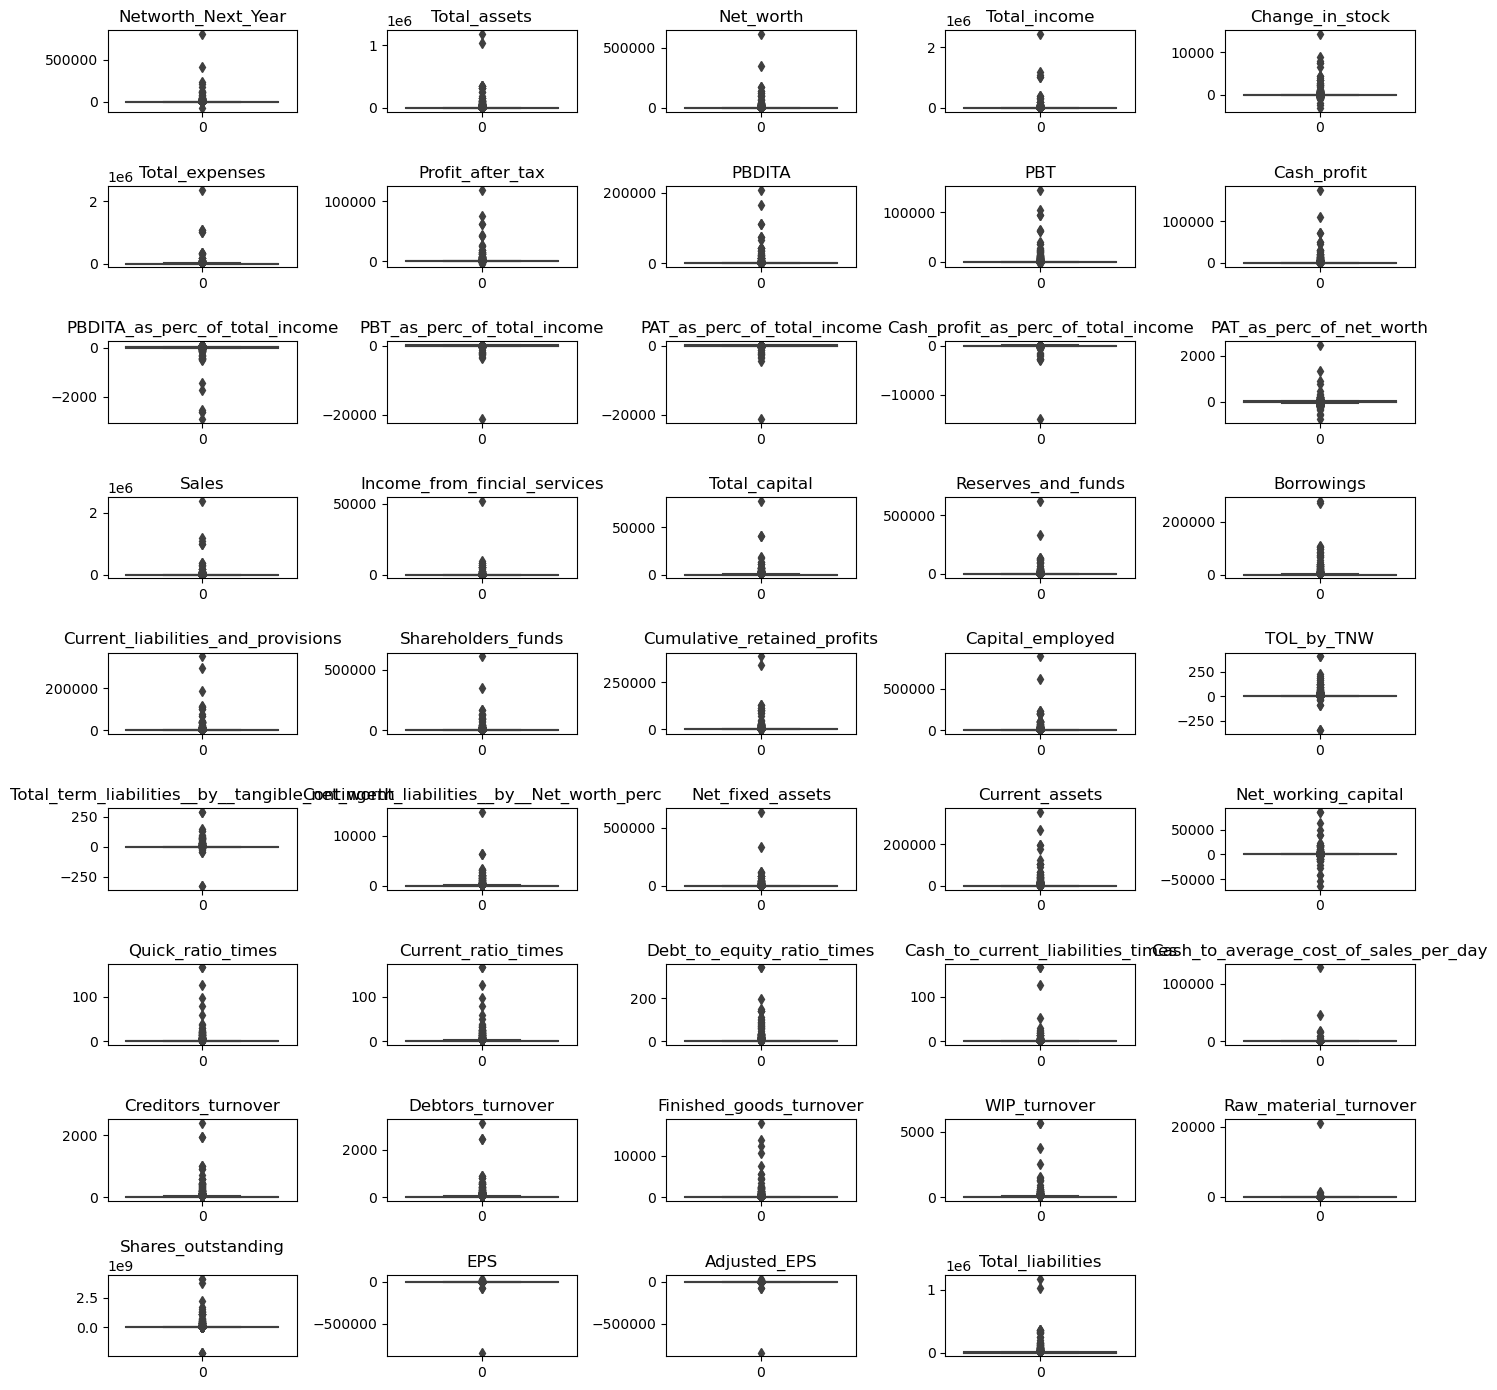

In [30]:
# after checking outliers
plt.figure(figsize = (14,14))
feature_list = df_num.columns
for i in range(len(feature_list)):
    plt.subplot(9, 5, i + 1)
    sns.boxplot( df_num[feature_list[i]])
    plt.title('{}'.format(feature_list[i]))
    plt.tight_layout()

all columns have outliers.

<Axes: xlabel='defaulter', ylabel='count'>

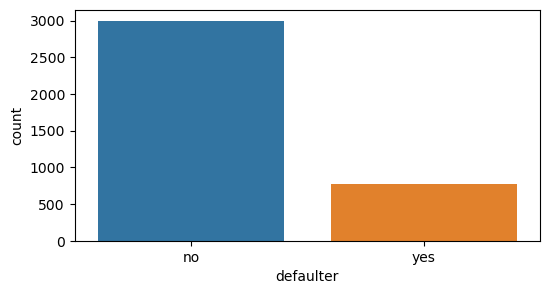

In [31]:
plt.figure(figsize=(6,3))
sns.countplot(data=df,x="defaulter")

more costomers are non defaulters,
21% defaulters.

In [32]:
df.columns

Index(['Networth_Next_Year', 'Total_assets', 'Net_worth', 'Total_income',
       'Change_in_stock', 'Total_expenses', 'Profit_after_tax', 'PBDITA',
       'PBT', 'Cash_profit', 'PBDITA_as_perc_of_total_income',
       'PBT_as_perc_of_total_income', 'PAT_as_perc_of_total_income',
       'Cash_profit_as_perc_of_total_income', 'PAT_as_perc_of_net_worth',
       'Sales', 'Income_from_fincial_services', 'Total_capital',
       'Reserves_and_funds', 'Borrowings',
       'Current_liabilities_and_provisions', 'Shareholders_funds',
       'Cumulative_retained_profits', 'Capital_employed', 'TOL_by_TNW',
       'Total_term_liabilities__by__tangible_net_worth',
       'Contingent_liabilities__by__Net_worth_perc', 'Net_fixed_assets',
       'Current_assets', 'Net_working_capital', 'Quick_ratio_times',
       'Current_ratio_times', 'Debt_to_equity_ratio_times',
       'Cash_to_current_liabilities_times',
       'Cash_to_average_cost_of_sales_per_day', 'Creditors_turnover',
       'Debtors_turnover',

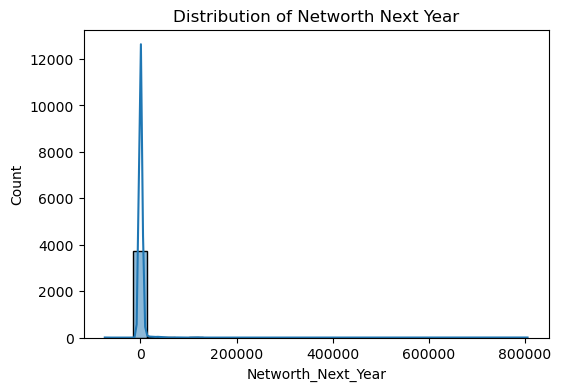

In [33]:
# Analyzing the target variable 'Networth Next Year'
plt.figure(figsize=(6, 4))
sns.histplot(df['Networth_Next_Year'], bins=30, kde=True)
plt.title('Distribution of Networth Next Year')
plt.show()

75% values are low,max networth of next year is 805773

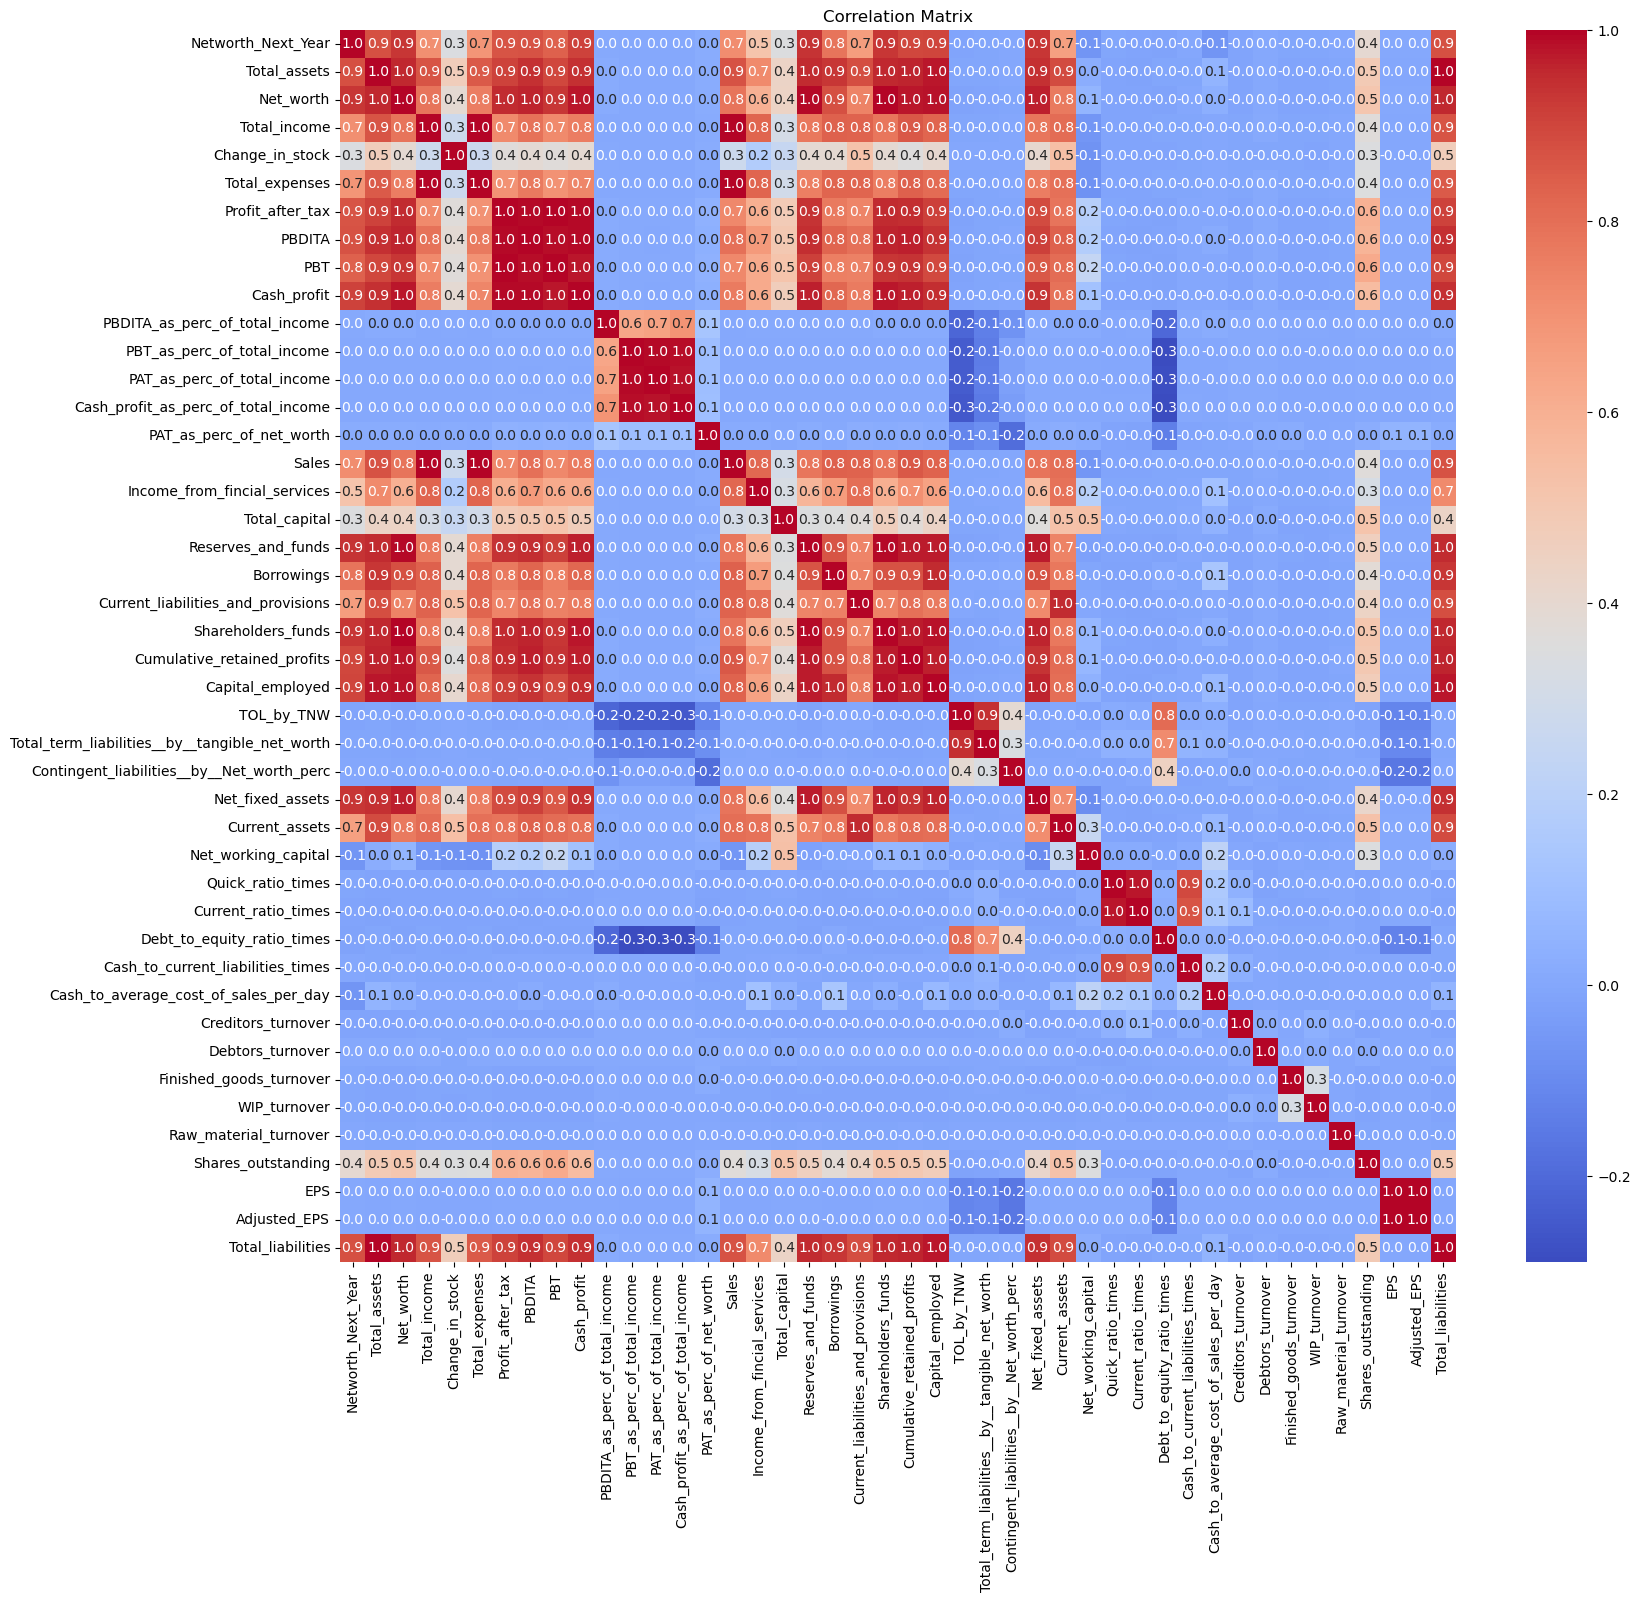

In [34]:
# Correlation matrix to identify relationships between numerical features
plt.figure(figsize=(18, 16))
corr_matrix = df_num.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Matrix')
plt.show()

###### Complex Relationships:
The presence of both positive and negative correlations suggests intricate dependencies. Further analysis could reveal hidden patterns or opportunities.

###### Strong Negative Correlations:
more variables are negative correlation.
Some variables show negative correlations. For instance, when one metric rises, another falls. Understanding these inverse relationships is crucial for hedging strategies.

we can seen multi colinarity 

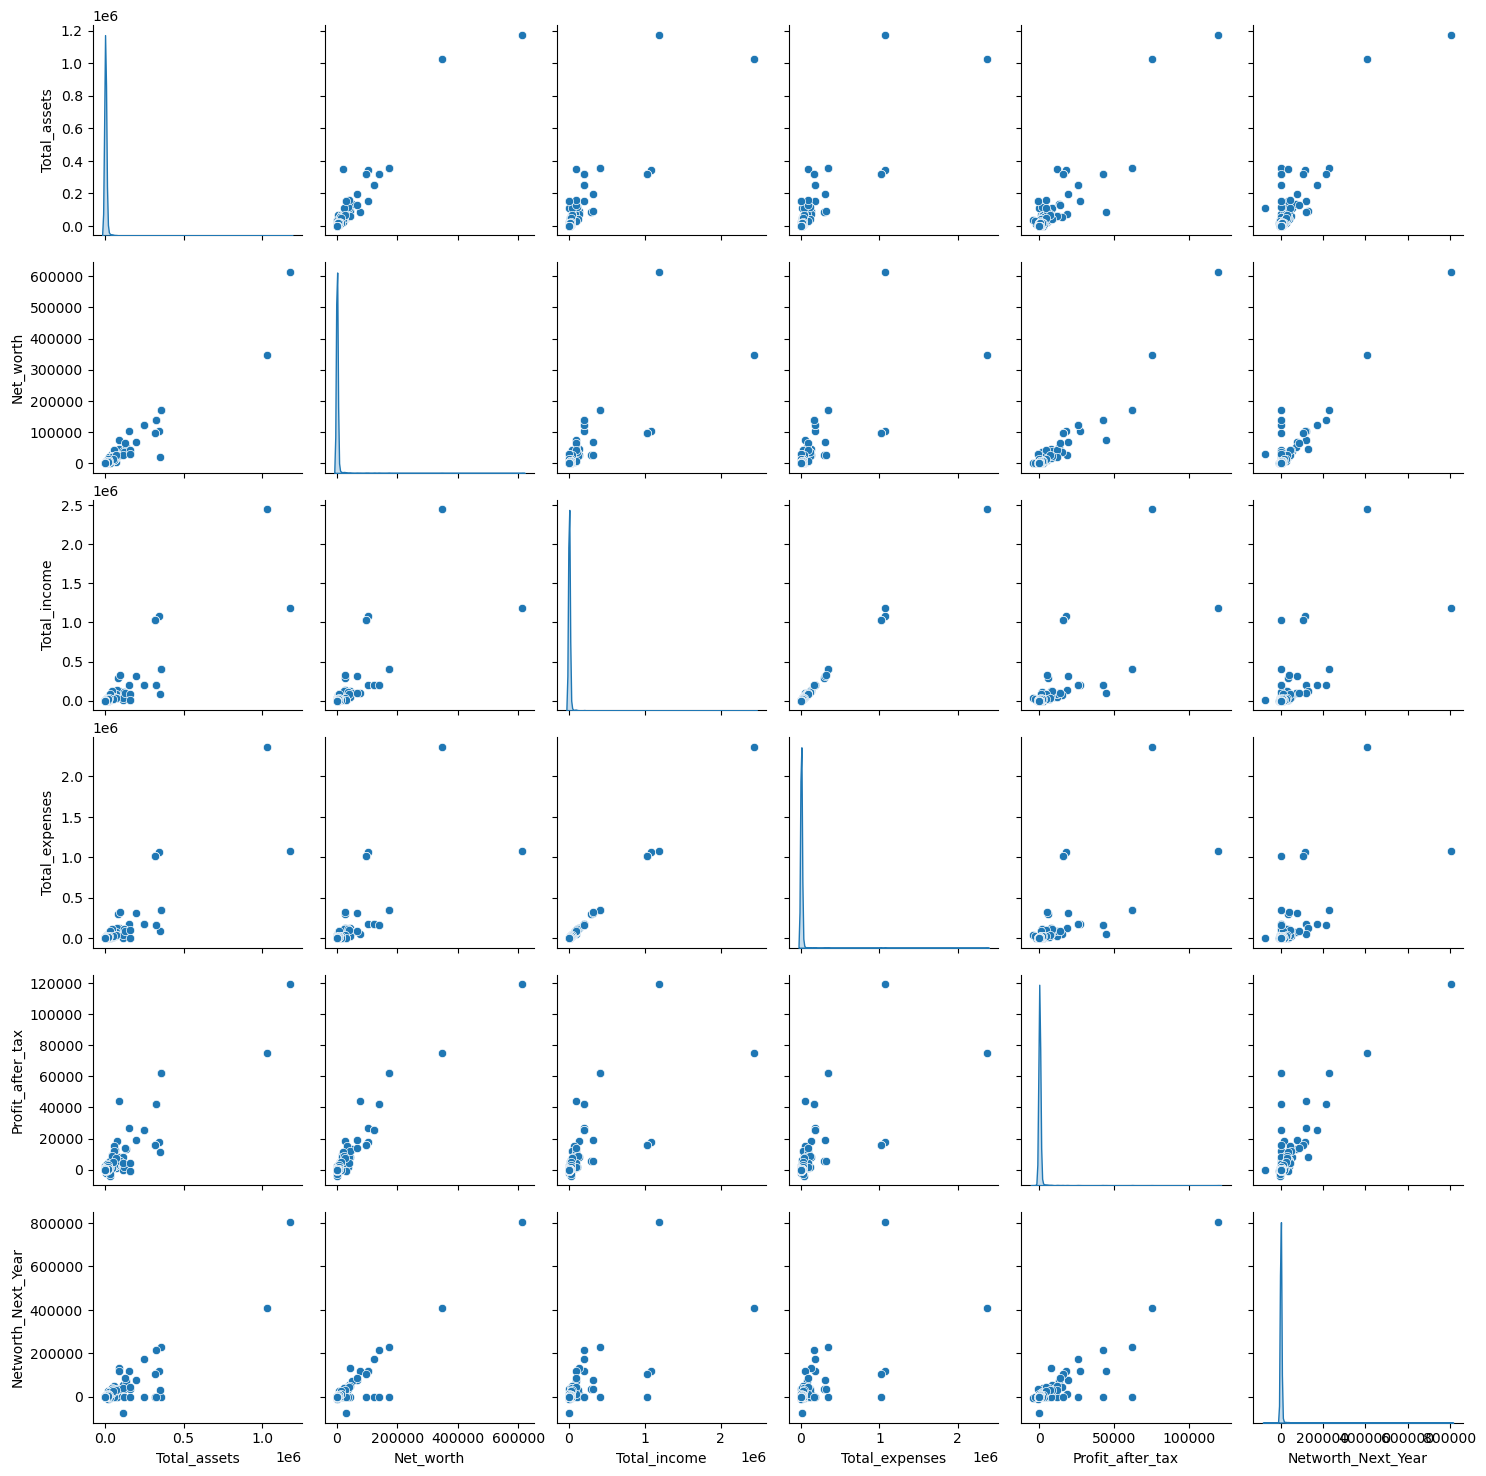

In [35]:
# Pairplot to visualize relationships between selected features
selected_features = ['Total_assets', 'Net_worth', 'Total_income', 'Total_expenses', 'Profit_after_tax', 'Networth_Next_Year']
sns.pairplot(df[selected_features], diag_kind='kde')
plt.show()

### INSIGHTS


1. **Net Worth vs. Total Assets:**
   - A positive correlation between net worth and total assets suggests that as assets increase, net worth tends to rise as well.
   - This aligns with the concept that net worth is influenced by the value of owned assets.

2. **Total Income vs. Total Expenses:**
   - The relationship between total income and total expenses is essential for financial management.
   - If expenses consistently exceed income, it could impact profitability.

3. **Profit After Tax vs. Net Worth Next Year:**
   - Examining the relationship between profit after tax and projected net worth for the next year can reveal growth potential.
   - Positive profit after tax contributes to net worth growth.

4. **Distribution of Features (Diagonal Plots):**
   - The diagonal plots show the distribution of each individual feature.
   - For example, the KDE (Kernel Density Estimation) plot for net worth next year indicates its distribution.



all are  positive correlation b/w each other.

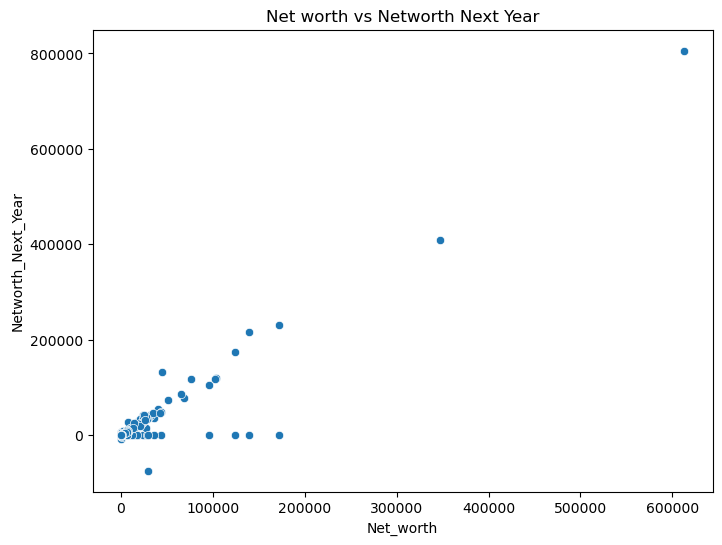

In [36]:
# Analyzing the relationship between 'Net worth' and 'Networth Next Year'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Net_worth', y='Networth_Next_Year', data=df)
plt.title('Net worth vs Networth Next Year')
plt.show()



1. **Positive Correlation:**
   - The majority of data points cluster in the lower range of both "Net worth" and "Networth Next Year."
   - As "Net worth" increases, there's a tendency for "Networth Next Year" to increase as well.
   - This suggests a positive correlation between an individual's current net worth and their net worth in the following year.

2. **Outlier:**
   - Notice the outlier at the top right corner of the plot.
   - This individual has a significantly higher net worth both currently and in the next year compared to others.
   - Investigating this outlier could provide valuable insights into factors driving substantial financial growth.



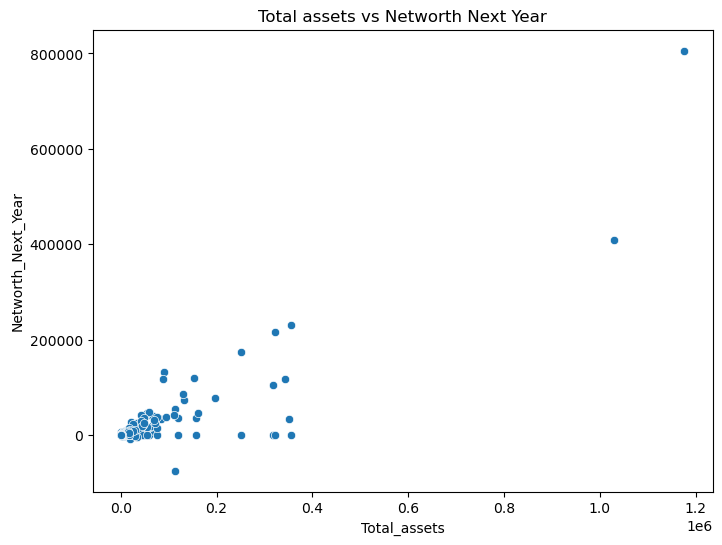

In [37]:
# Analyzing the relationship between 'Total assets' and 'Networth Next Year'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total_assets', y='Networth_Next_Year', data=df)
plt.title('Total assets vs Networth Next Year')
plt.show()



1. **Positive Correlation:**
   - The scatter plot shows data points that suggest a positive correlation between "Total assets" and "Networth Next Year."
   - As "Total assets" increase, there's a tendency for "Networth Next Year" to increase as well.

2. **Outliers:**
   - Observe any outliers in the plot.
   - These points may represent individuals with exceptional financial situations.
   - Investigating outliers can provide valuable insights.




### Individual Variables

1. **Networth Next Year:**
   - The distribution is roughly normal with a mean around 2000. 
   - There are some outliers indicating a few companies with significantly higher projected net worth.

2. **Total Assets:**
   - The distribution shows high variability with extreme values, indicating some companies have very large total assets.
   - The presence of significant outliers suggests a few companies dominate in terms of total assets.

3. **Net Worth:**
   - The distribution is wide, indicating a diverse range of company net worth.
   - Extreme outliers exist, indicating some companies have exceptionally high net worth.

4. **Total Income and Total Expenses:**
   - Both distributions show a reasonable spread with some outliers.
   - This suggests a range of income and expense levels across companies, with a few having very high income or expenses.

5. **Profit After Tax:**
   - High variance indicates different levels of profitability among companies.
   - Some extreme values suggest a few companies have exceptionally high profits.

6. **Shares Outstanding:**
   - The distribution has very high variance, indicating different scales of companies in terms of shares.
   - A few companies have extremely high shares outstanding, which could be indicative of large public corporations.

7. **EPS (Earnings Per Share):**
   - Negative values indicate that some companies are experiencing losses.
   - A wide spread with extreme outliers shows significant variability in company performance.

8. **Total Liabilities:**
   - The spread is similar to net worth, indicating a range of liability levels across companies.
   - Some outliers suggest a few companies have exceptionally high liabilities.

### Relationships Between Variables

1. **Net Worth vs. Total Assets:**
   - A positive correlation suggests that as total assets increase, net worth tends to rise.
   - This is expected, as higher assets contribute to higher net worth.

2. **Total Income vs. Total Expenses:**
   - A strong positive correlation indicates that companies with higher income also tend to have higher expenses.
   - This could be due to larger companies having higher operational costs.

3. **Profit After Tax vs. Net Worth Next Year:**
   - Positive correlation suggests that higher profit after tax contributes to an increase in net worth for the next year.
   - This implies that profitability is a key driver of future net worth growth.

### Correlation Matrix

1. **Positive Correlations:**
   - Variables such as total assets, net worth, and net worth next year show positive correlations, indicating that they tend to move together.
   - This is consistent with the expectation that higher assets and profitability contribute to higher net worth.

2. **Negative Correlations:**
   - The presence of negative correlations, though not explicitly detailed, suggests inverse relationships between certain variables.
   - For instance, higher expenses might negatively impact profit, leading to lower net worth growth.

### Outliers

1. **Impact of Outliers:**
   - Significant outliers in net worth, total assets, income, and other variables indicate that a few companies have extreme values.
   - These outliers can skew the analysis and should be examined separately to understand the factors contributing to their exceptional values.

2. **Insights from Outliers:**
   - Investigating the outliers can provide valuable insights into what drives exceptional financial performance or challenges.
   - For instance, companies with extremely high net worth or assets might have unique business models, market positions, or operational efficiencies.

### General Observations

1. **Financial Health and Performance Patterns:**
   - The majority of companies cluster around lower ranges for most financial metrics, indicating that extreme values are not common.
   - This clustering suggests that while some companies excel, many operate within a more modest financial range.

2. **Distribution Patterns:**
   - The distribution plots reveal that most financial metrics follow a normal distribution with some skewness due to outliers.
   - This indicates that while the central tendency is stable, variability exists among the companies.

### Conclusion

- **Diverse Financial Landscape:** The dataset represents a diverse financial landscape with significant variability in key metrics.
- **Key Drivers:** Profitability, total assets, and income levels are key drivers of net worth and future financial health.
- **Outlier Analysis:** Detailed analysis of outliers can reveal insights into exceptional financial performance or challenges.
- **Strategic Implications:** Understanding the correlations and distributions can help in strategic planning, risk management, and identifying growth opportunities.



In [38]:
df.drop('Networth_Next_Year',axis=1,inplace=True);

## 2 -: Data Pre-processing
Prepare the data for modeling: - Outlier Detection (treat, if needed) - Encode the data - Data split - Scale the data - Target variable creation * The target variable is default and should take the value 1 when net worth next year is negative & 0 when net worth next year is positive

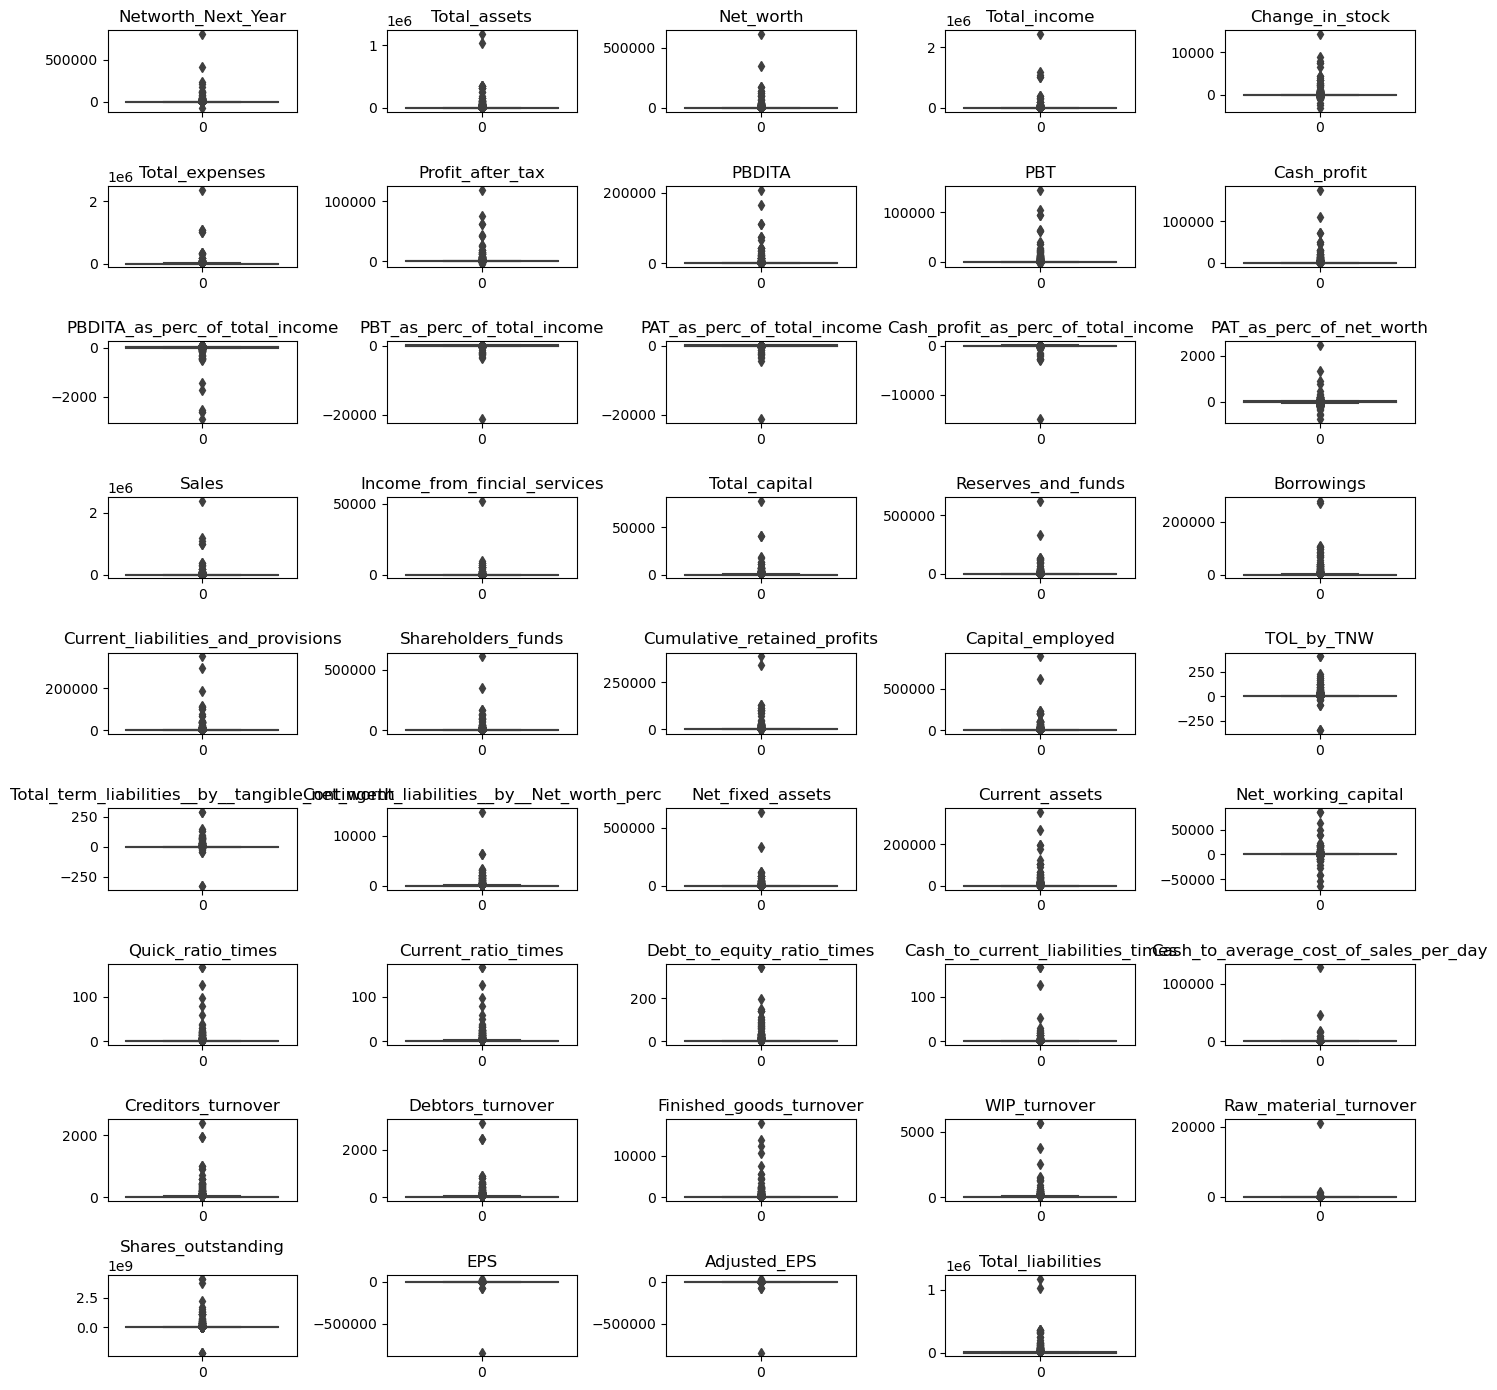

In [39]:
#Outlier Detection (treat, if needed)
plt.figure(figsize = (14,14))
feature_list = df_num.columns
for i in range(len(feature_list)):
    plt.subplot(9, 5, i + 1)
    sns.boxplot( df_num[feature_list[i]])
    plt.title('{}'.format(feature_list[i]))
    plt.tight_layout()

In [40]:
def remove_outlier(df_num):
    Q1 = df_num.quantile(0.25)
    Q3 = df_num.quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    upper= Q3 + 1.5 * IQR
    return low,upper

In [41]:
for i in df_num.columns:
    lw,hi=remove_outlier(df_num[i])
    df_num[i]=np.where(df_num[i]<lw,lw,df_num[i])
    df_num[i]=np.where(df_num[i]>hi,hi,df_num[i])

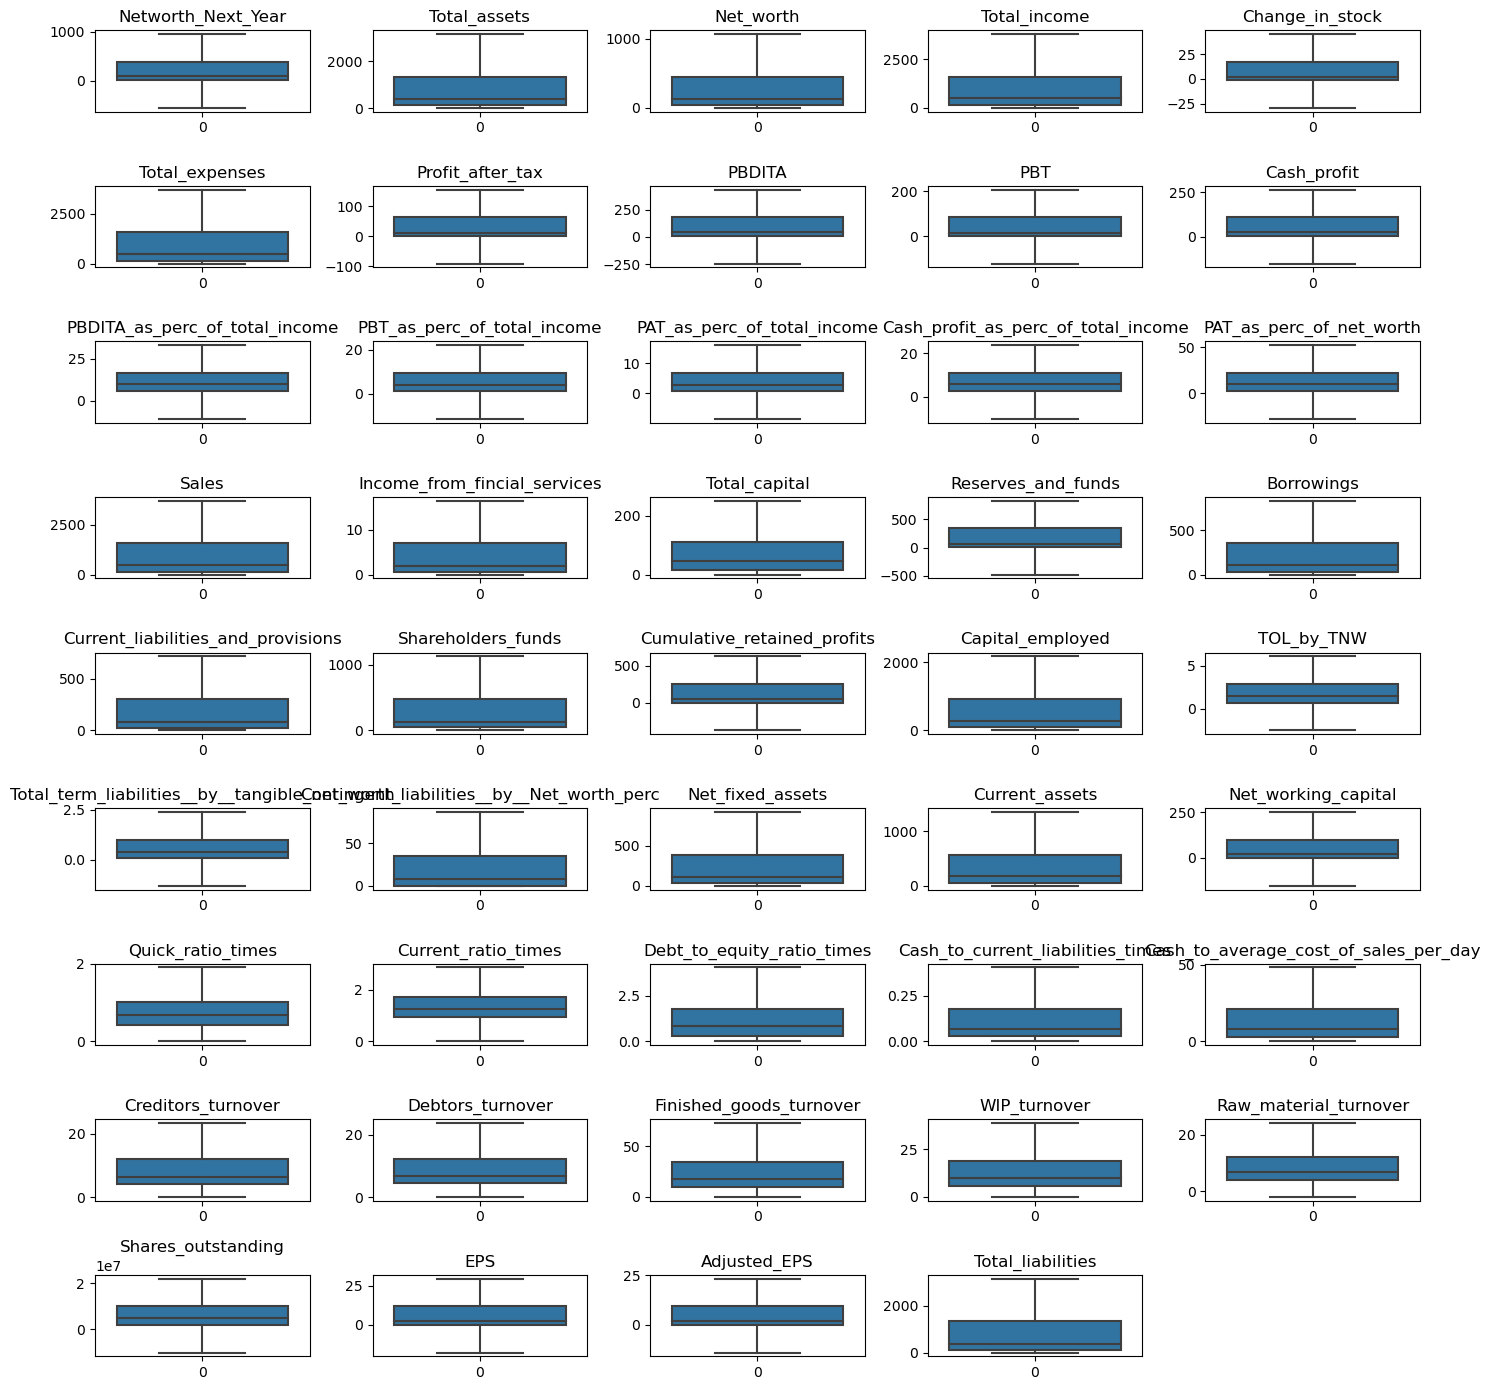

In [42]:
# after checking outliers
plt.figure(figsize = (14,14))
feature_list = df_num.columns
for i in range(len(feature_list)):
    plt.subplot(9, 5, i + 1)
    sns.boxplot( df_num[feature_list[i]])
    plt.title('{}'.format(feature_list[i]))
    plt.tight_layout()

In [43]:
df= pd.concat([df_num, df["defaulter"]], axis=1)

### Encode the data

In [44]:
#from sklearn import LabelEncoder
df = pd.get_dummies(df, drop_first = True)

In [45]:
df

,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,...,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,EPS,Adjusted_EPS,Total_liabilities,defaulter_yes
0,395.30,827.60,336.50,534.10,13.50,508.70,38.90,124.40,64.60,95.20,...,11.60,5.65,3.99,3.37,14.87,8760056.00,4.44,4.44,827.60,0
2,84.00,238.40,78.90,331.20,-18.10,309.20,3.90,25.80,10.50,9.40,...,2.24,2.51,17.67,8.76,8.35,4800400.00,0.00,0.00,238.40,0
3,953.99,3173.76,1070.71,3803.34,45.22,3727.35,155.29,418.40,185.10,178.00,...,3.48,1.91,18.14,18.62,11.11,10000000.00,17.60,17.60,3173.76,0
4,41.80,90.90,47.00,388.60,3.40,392.70,-0.70,7.20,-0.60,3.90,...,21.67,23.67,45.87,28.67,19.93,107315.00,-6.52,-6.52,90.90,0
5,291.50,573.80,238.60,582.60,31.00,565.30,48.30,110.10,68.50,82.60,...,12.52,7.25,5.73,4.62,3.72,3807100.00,12.69,0.63,573.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4250,336.50,455.20,197.80,199.20,1.80,193.30,5.90,59.10,6.70,35.90,...,1.62,2.12,17.49,9.94,4.09,8128880.00,0.73,0.73,455.20,0
4252,93.30,159.60,86.70,172.90,0.10,169.70,3.30,18.40,3.70,12.60,...,4.86,1.80,11.00,8.28,9.88,8162700.00,0.42,0.42,159.60,0
4253,932.20,833.80,664.60,2314.70,32.10,2151.60,155.29,348.40,208.06,219.50,...,23.40,6.08,59.28,31.14,9.87,7479762.00,26.58,23.34,833.80,0
4254,64.60,95.00,48.50,110.50,4.60,113.50,1.60,9.70,2.60,6.70,...,6.12,3.71,72.96,11.51,14.95,4800400.00,0.00,0.00,95.00,0


In [46]:
df = df.rename(columns={"defaulter_yes": "defaulter"})

In [47]:
df["defaulter"].value_counts()

0    2998
1     774
Name: defaulter, dtype: int64

In [48]:
df["defaulter"].value_counts(normalize=True)

0   0.79
1   0.21
Name: defaulter, dtype: float64

### Split

In [49]:

from sklearn.model_selection import train_test_split
# Assuming df is your original DataFrame

# Split the data
X = df.drop(['defaulter', "Networth_Next_Year"], axis=1)
y = df['defaulter']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)


In [50]:
df.drop("Networth_Next_Year", axis=1,inplace=True)

#### Scale the data 

In [51]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [52]:
# Convert scaled data back to DataFrame
X_train_scaled_ = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_ = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [53]:
X_train_scaled_.head()

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_perc_of_total_income,...,Cash_to_average_cost_of_sales_per_day,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,EPS,Adjusted_EPS,Total_liabilities
0,0.47,0.54,0.98,1.70,1.01,0.42,0.83,0.71,0.87,-0.12,...,-0.56,0.74,0.61,-0.20,-0.28,0.60,0.64,-0.13,-0.00,0.47
1,-0.81,-0.81,-0.81,-0.31,-0.81,-0.63,-0.76,-0.65,-0.70,-0.83,...,-0.76,-0.43,-0.06,-0.86,-1.00,-0.37,-0.35,-0.62,-0.61,-0.81
2,-0.83,-0.83,-0.85,-0.16,-0.83,-0.78,-0.83,-0.76,-0.80,-2.39,...,0.28,-0.01,-0.30,-0.70,-0.63,0.68,-0.87,-1.41,-1.58,-0.83
3,1.95,1.93,1.58,-1.13,1.56,0.76,1.25,0.95,0.10,-0.18,...,2.08,-0.47,1.14,0.67,2.13,-1.00,-1.01,2.01,1.97,1.95
4,-0.82,-0.81,-0.86,-0.39,-0.86,-0.64,-0.78,-0.66,-0.72,2.30,...,-0.94,-1.32,-1.35,-1.13,-1.18,-1.29,-0.32,-0.63,-0.62,-0.82


In [54]:
#our target column is "defaulter"

### 3: Model Building
- Metrics of Choice (Justify the evaluation metrics) - Model Building (Logistic Regression, Random Forest) - Model performance check across different metrics

#### Metrics of Choice (Justify the evaluation metrics) 


When evaluating the performance of a predictive model for identifying financial defaulters, it is crucial to use appropriate metrics that provide a comprehensive view of the model's effectiveness. Below are the key metrics chosen for evaluation and their justifications:

#### Accuracy

Definition: Accuracy is the proportion of correctly predicted instances (both true positives and true negatives) out of the total instances.
 
Justification: Accuracy is a straightforward metric that provides an overall performance measure of the model. However, it can be misleading if the classes are imbalanced (e.g., if there are significantly more non-defaulters than defaulters).

#### Precision

Definition: Precision is the proportion of true positive predictions out of the total positive predictions made by the model.


Justification: Precision is particularly important in this context because it measures the accuracy of the positive predictions (defaulters). High precision indicates that the model has a low false positive rate, which is crucial for reducing the cost and effort of wrongly tagging a non-defaulter as a defaulter.

##### Recall (Sensitivity)

Definition: Recall is the proportion of true positive predictions out of the total actual positives.

Justification: Recall measures the model's ability to identify all actual defaulters. High recall is essential for ensuring that most defaulters are correctly identified, which is critical for proactive risk mitigation.

#### F1-Score

Definition: The F1-score is the harmonic mean of precision and recall.



Justification: The F1-score balances precision and recall, providing a single metric that accounts for both false positives and false negatives. This is particularly useful when dealing with imbalanced datasets where focusing on one metric
can be misleading. The F1-score is particularly relevant for ensuring that both the identification of actual defaulters and the avoidance of incorrectly tagging non-defaulters are balanced.

##### ROC-AUC (Receiver Operating Characteristic - Area Under the Curve)

Definition: The ROC-AUC measures the ability of the model to distinguish between classes. It plots the true positive rate (recall) against the false positive rate (1 - specificity) at various threshold settings.

Justification: The ROC-AUC score provides a comprehensive measure of model performance across all classification thresholds. A higher AUC indicates better overall performance and the ability to distinguish between defaulters and non-defaulters. It is particularly useful for comparing models

### Model Building (Logistic Regression, Random Forest)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled_, y_train)



LogisticRegression()

### Validating on  train set

In [56]:
y_pred_log_reg_train = log_reg.predict(X_train_scaled_)

print("Logistic Regression Report:\n", classification_report(y_train,y_pred_log_reg_train))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.89      2098
           1       0.63      0.04      0.08       542

    accuracy                           0.80      2640
   macro avg       0.72      0.52      0.48      2640
weighted avg       0.77      0.80      0.72      2640



In [57]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train,y_pred_log_reg_train))

[[2084   14]
 [ 518   24]]


### Validating on  test set

In [58]:
y_pred_log_reg_test = log_reg.predict(X_test_scaled_)

print("Logistic Regression Report:\n", classification_report(y_test,y_pred_log_reg_test))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.89       900
           1       0.61      0.05      0.09       232

    accuracy                           0.80      1132
   macro avg       0.71      0.52      0.49      1132
weighted avg       0.76      0.80      0.72      1132



In [59]:
print(confusion_matrix(y_test,y_pred_log_reg_test))

[[893   7]
 [221  11]]


### Observation of Logistic Regression Model


### Key Observations
1. **High Accuracy but Imbalanced Performance:**
   - The model achieves high accuracy (80%) on both the training and test sets. However, this accuracy is driven by the model's performance on the majority class (non-defaulters).

2. **Poor Recall for Defaulters:**
   - The recall for class 1 (defaulters) is extremely low (0.04 on the training set and 0.05 on the test set). This indicates that the model fails to identify most of the defaulters.

3. **Precision and F1-Score for Defaulters:**
   - The precision for class 1 (defaulters) is moderate (0.63 on the training set and 0.61 on the test set), but the F1-score is very low (0.08 on the training set and 0.09 on the test set). This low F1-score suggests that the model's balance between precision and recall for defaulters is poor.

4. **Class Imbalance Issue:**
   - The confusion matrix shows a significant class imbalance issue. The model is heavily biased towards predicting the majority class (non-defaulters). This is evidenced by the high number of false negatives for defaulters.

### Recommendations for Improvement
1. **Address Class Imbalance:**
   - Implement techniques such as SMOTE (Synthetic Minority Over-sampling Technique) or ADASYN to balance the training dataset.
   - Consider using class weighting in the logistic regression model to give more importance to the minority class (defaulters).

2. **Feature Engineering:**
   - Explore additional features or transformations that might improve the model's ability to differentiate between defaulters and non-defaulters.

3. **Model Selection and Hyperparameter Tuning:**
   - Experiment with different models such as Random Forest, Gradient Boosting, or XGBoost, which might handle the imbalance better.
   - Perform hyperparameter tuning using techniques like Grid Search or Random Search to find the optimal parameters for the logistic regression model.

4. **Evaluation Metrics:**
   - Use metrics like ROC-AUC, Precision-Recall AUC, and F1-score to evaluate model performance more comprehensively, especially focusing on the minority class.



In [60]:
from imblearn.over_sampling import SMOTE
# Step 4: Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Step 5: Train the logistic regression model on the SMOTE-transformed data
log_reg_smote = LogisticRegression()
log_reg_smote.fit(X_train_smote, y_train_smote)

# Step 6: Evaluate the model on the training set
y_pred_log_reg_train_smote = log_reg_smote.predict(X_train_smote)
print("Logistic Regression Report (Training Set):\n", classification_report(y_train_smote, y_pred_log_reg_train_smote))
print(confusion_matrix(y_train_smote, y_pred_log_reg_train_smote))

# Step 7: Evaluate the model on the test set
y_pred_log_reg_test_smote = log_reg_smote.predict(X_test_scaled)
print("\n Logistic Regression Report (Test Set):\n", classification_report(y_test, y_pred_log_reg_test_smote))
print(confusion_matrix(y_test, y_pred_log_reg_test_smote))

Logistic Regression Report (Training Set):
               precision    recall  f1-score   support

           0       0.58      0.65      0.61      2098
           1       0.60      0.53      0.56      2098

    accuracy                           0.59      4196
   macro avg       0.59      0.59      0.59      4196
weighted avg       0.59      0.59      0.59      4196

[[1361  737]
 [ 996 1102]]

 Logistic Regression Report (Test Set):
               precision    recall  f1-score   support

           0       0.81      0.60      0.69       900
           1       0.23      0.46      0.30       232

    accuracy                           0.57      1132
   macro avg       0.52      0.53      0.50      1132
weighted avg       0.69      0.57      0.61      1132

[[542 358]
 [126 106]]


### Observation After Applying SMOTE


### Key Observations
1. **Improvement in Recall for Defaulters:**
   - The recall for class 1 (defaulters) on the test set has significantly improved from 0.05 to 0.46. This means the model is now able to identify 46% of the defaulters compared to only 5% before applying SMOTE.

2. **Decrease in Precision for Defaulters:**
   - The precision for class 1 (defaulters) on the test set has decreased from 0.61 to 0.23. This indicates that a higher proportion of the predicted defaulters are actually non-defaulters (false positives).

3. **Balanced Recall Across Classes:**
   - The recall for class 0 (non-defaulters) on the test set has decreased from 0.99 to 0.60. This suggests the model is making more mistakes in predicting non-defaulters correctly, balancing the recall across both classes.

4. **Overall Accuracy and F1-Score:**
   - The overall accuracy has decreased from 0.80 to 0.57. The F1-score for class 1 (defaulters) has improved from 0.09 to 0.30, indicating a better balance between precision and recall for the minority class.
   - The F1-score for class 0 (non-defaulters) has decreased from 0.89 to 0.69, which is expected due to the balancing effect of SMOTE.

5. **Confusion Matrix Analysis:**
   - There is a significant increase in false positives for class 0 (non-defaulters predicted as defaulters) on the test set (from 7 to 358).
   - There is a considerable decrease in false negatives for class 1 (defaulters predicted as non-defaulters) on the test set (from 221 to 126).

### Recommendations for Further Improvement
1. **Threshold Adjustment:**
   - Adjust the decision threshold of the logistic regression model to find a better balance between precision and recall for both classes.

2. **Additional Over-sampling/Under-sampling Techniques:**
   - Experiment with other over-sampling methods like ADASYN or combine over-sampling with under-sampling techniques to further balance the classes.

3. **Model Tuning and Ensemble Methods:**
   - Fine-tune the logistic regression model parameters.
   - Explore ensemble methods such as Random Forest or Gradient Boosting, which may handle imbalanced datasets better.

4. **Feature Engineering and Selection:**
   - Improve feature engineering to capture more relevant patterns and reduce noise.
   - Use feature selection techniques to keep only the most informative features.

5. **Cross-validation:**
   - Implement cross-validation to ensure the model's robustness and generalize better to unseen data.

### Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf = RandomForestClassifier(random_state=123)
rf.fit(X_train_scaled, y_train)




RandomForestClassifier(random_state=123)

### Validating on train set

In [62]:
y_pred_rf_train = rf.predict(X_train_scaled_)

In [63]:
print("Random Forest Report:\n", classification_report(y_train, y_pred_rf_train))

Random Forest Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      2098
           1       0.84      0.54      0.65       542

    accuracy                           0.88      2640
   macro avg       0.87      0.75      0.79      2640
weighted avg       0.88      0.88      0.87      2640



In [64]:
print(confusion_matrix(y_train,y_pred_rf_train))

[[2044   54]
 [ 252  290]]


#### Validating on resampled test set

In [65]:
y_pred_rf_test = rf.predict(X_test_scaled_)

print("Random Forest Report:\n", classification_report(y_test, y_pred_rf_test))


Random Forest Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80       900
           1       0.09      0.06      0.07       232

    accuracy                           0.67      1132
   macro avg       0.43      0.45      0.44      1132
weighted avg       0.63      0.67      0.65      1132



In [66]:
print(confusion_matrix(y_test,y_pred_rf_test))

[[745 155]
 [217  15]]


Certainly! Here's a structured summary focusing on key observations, performance evaluation, and recommendations for improving the Random Forest model:

### Key Observations:

1. **Class Imbalance Impact**:
   - The dataset is imbalanced with a majority of non-defaulters (class 0) compared to defaulters (class 1).
   - The model shows significant difficulty in correctly identifying defaulters, as evidenced by low recall and precision for class 1.

2. **Training Set Performance**:
   - **Precision and Recall**: High precision (0.89) and recall (0.97) for class 0 indicate good performance in predicting non-defaulters.
   - Lower precision (0.84) and moderate recall (0.54) for class 1 suggest the model identifies some defaulters but misses a substantial portion.

3. **Testing Set Performance**:
   - **Precision and Recall**: Decent precision (0.77) and recall (0.83) for class 0 indicate reasonable performance in predicting non-defaulters.
   - Very low precision (0.09) and recall (0.06) for class 1 highlight the model's severe limitations in identifying actual defaulters.

4. **Overall Accuracy**: The overall accuracy of 0.67 indicates the model's mixed performance across both classes, with a notable deficiency in predicting defaulters.

### Performance Evaluation:

- **Strengths**:
  - Good performance in predicting non-defaulters (class 0) with high precision and recall.
  - Generalization to unseen data shown by reasonable performance on non-defaulters in the test set.

- **Weaknesses**:
  - Poor performance in predicting defaulters (class 1) reflected in very low precision and recall.
  - Significant misclassification of defaulters, leading to a skewed confusion matrix and overall low accuracy.

### Recommendations for Improvement:

1. **Address Class Imbalance**:
   - Use resampling techniques like SMOTE to balance the dataset and improve the model's ability to learn from minority class examples (defaulters).

2. **Model Optimization**:
   - Perform hyperparameter tuning using techniques like GridSearchCV or RandomizedSearchCV to find optimal parameters that improve performance on both classes.

3. **Feature Engineering and Selection**:
   - Explore additional features or transformations that might better capture the characteristics distinguishing defaulters from non-defaulters.

4. **Alternative Algorithms**:
   - Consider using algorithms like XGBoost, LightGBM, or ensemble methods, which are known for handling imbalanced datasets and might provide better performance.

5. **Evaluation Metrics**:
   - Focus on metrics like F1-score, Precision-Recall AUC, and confusion matrix analysis to better understand and improve model performance on defaulters.

6. **Model Interpretability**:
   - Utilize techniques to interpret feature importance and model decisions to gain insights into factors influencing predictions, especially for defaulters.



### 4: Model Performance Improvement
- Dealing with multicollinearity using VIF - Identify optimal threshold for Logistic Regression using ROC curve - Hyperparameter Tuning for Random Forest - Model performance check across different metrics

### Dealing with multicollinearity using VIF	

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [68]:
X = df.drop(['defaulter'], axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
0,Total_assets,inf
42,Total_liabilities,inf
4,Total_expenses,565.12
2,Total_income,565.11
14,Sales,349.10
20,Shareholders_funds,216.89
1,Net_worth,186.37
22,Capital_employed,155.31
7,PBT,89.32
5,Profit_after_tax,86.76


In [69]:
X = X.drop(["Total_liabilities","Total_assets"], axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
3,Total_expenses,565.03
1,Total_income,563.45
13,Sales,348.51
19,Shareholders_funds,216.85
0,Net_worth,186.21
6,PBT,88.90
4,Profit_after_tax,86.58
21,Capital_employed,77.58
5,PBDITA,49.79
9,PBT_as_perc_of_total_income,40.86


In [70]:
X = X.drop(["Total_expenses","Total_income"], axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
17,Shareholders_funds,214.72
0,Net_worth,184.34
4,PBT,88.30
2,Profit_after_tax,84.63
19,Capital_employed,77.15
3,PBDITA,42.36
7,PBT_as_perc_of_total_income,40.78
8,PAT_as_perc_of_total_income,38.88
24,Current_assets,37.66
5,Cash_profit,33.24


In [71]:
X = X.drop(["Shareholders_funds","Net_worth"], axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
3,PBT,87.98
1,Profit_after_tax,84.45
17,Capital_employed,45.67
2,PBDITA,42.32
6,PBT_as_perc_of_total_income,40.71
7,PAT_as_perc_of_total_income,38.86
22,Current_assets,37.58
4,Cash_profit,33.07
10,Sales,21.44
25,Current_ratio_times,20.94


In [72]:
X = X.drop(["PBT","Profit_after_tax","Capital_employed","PBDITA","PBT_as_perc_of_total_income"], axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
17,Current_assets,32.38
6,Sales,20.74
20,Current_ratio_times,20.68
11,Current_liabilities_and_provisions,19.41
19,Quick_ratio_times,19.21
9,Reserves_and_funds,16.75
30,EPS,14.51
31,Adjusted_EPS,13.08
21,Debt_to_equity_ratio_times,13.07
12,Cumulative_retained_profits,13.05


In [73]:
X=X.drop([
    'Current_assets',
    'Sales',
    'Current_ratio_times',
    'Current_liabilities_and_provisions',
    'Quick_ratio_times',
    'Reserves_and_funds',
    'EPS'
],axis=1)


In [74]:
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
15,Debt_to_equity_ratio_times,12.68
2,PBDITA_as_perc_of_total_income,12.22
4,Cash_profit_as_perc_of_total_income,11.42
13,Net_fixed_assets,10.98
10,TOL_by_TNW,10.00
7,Total_capital,9.53
23,Shares_outstanding,8.56
1,Cash_profit,8.52
16,Cash_to_current_liabilities_times,8.47
17,Cash_to_average_cost_of_sales_per_day,7.99


In [75]:
X = X.drop([
    'Debt_to_equity_ratio_times',
    'PBDITA_as_perc_of_total_income',
    'Cash_profit_as_perc_of_total_income',
    'Net_fixed_assets',
    'TOL_by_TNW'
], axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
5,Total_capital,8.98
18,Shares_outstanding,8.51
11,Cash_to_current_liabilities_times,7.75
1,Cash_profit,7.36
12,Cash_to_average_cost_of_sales_per_day,6.76
16,WIP_turnover,5.86
7,Cumulative_retained_profits,5.47
15,Finished_goods_turnover,5.05
6,Borrowings,4.80
3,PAT_as_perc_of_net_worth,3.79


In [76]:
X = X.drop([
    'Total_capital',
    'Shares_outstanding'
], axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
10,Cash_to_current_liabilities_times,7.73
11,Cash_to_average_cost_of_sales_per_day,6.64
1,Cash_profit,6.46
15,WIP_turnover,5.85
14,Finished_goods_turnover,5.03
6,Cumulative_retained_profits,4.99
5,Borrowings,4.10
3,PAT_as_perc_of_net_worth,3.76
12,Creditors_turnover,3.63
2,PAT_as_perc_of_total_income,3.60


In [77]:
X = X.drop([
    'Cash_to_current_liabilities_times',"Cash_to_average_cost_of_sales_per_day",
    'Cash_profit'
], axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
12,WIP_turnover,5.80
11,Finished_goods_turnover,5.01
5,Cumulative_retained_profits,3.72
9,Creditors_turnover,3.48
4,Borrowings,3.46
2,PAT_as_perc_of_net_worth,3.45
10,Debtors_turnover,3.39
1,PAT_as_perc_of_total_income,3.29
3,Income_from_fincial_services,3.27
13,Raw_material_turnover,2.95


In [78]:
X = X.drop([
    'WIP_turnover',
    'Finished_goods_turnover'
], axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
5,Cumulative_retained_profits,3.72
4,Borrowings,3.44
2,PAT_as_perc_of_net_worth,3.41
10,Debtors_turnover,3.35
1,PAT_as_perc_of_total_income,3.29
9,Creditors_turnover,3.28
3,Income_from_fincial_services,3.24
11,Raw_material_turnover,2.71
6,Total_term_liabilities__by__tangible_net_worth,2.24
12,Adjusted_EPS,2.08


#### modified logestic regression

In [79]:
# Combine scaled data with the target variable
Df_train = pd.concat([X_train_scaled_, y_train.reset_index(drop=True)], axis=1)
Df_test = pd.concat([X_test_scaled_, y_test.reset_index(drop=True)], axis=1)

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
import statsmodels.formula.api as SM

In [82]:
# Define the formula based on the variables in X_train_scaled_
F_1 = 'defaulter ~ Change_in_stock + PAT_as_perc_of_net_worth + Income_from_fincial_services + Borrowings + Cumulative_retained_profits + Total_term_liabilities__by__tangible_net_worth + Contingent_liabilities__by__Net_worth_perc + Net_working_capital + Creditors_turnover + Debtors_turnover + Raw_material_turnover + Adjusted_EPS'

# Fit the logistic regression model
model_2 = SM.logit(formula=F_1, data=Df_train).fit()
print(model_2.summary())

Optimization terminated successfully.
         Current function value: 0.495606
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              defaulter   No. Observations:                 2640
Model:                          Logit   Df Residuals:                     2627
Method:                           MLE   Df Model:                           12
Date:                Thu, 20 Jun 2024   Pseudo R-squ.:                 0.02376
Time:                        17:49:32   Log-Likelihood:                -1308.4
converged:                       True   LL-Null:                       -1340.2
Covariance Type:            nonrobust   LLR p-value:                 4.781e-09
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                           

In [83]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              defaulter   No. Observations:                 2640
Model:                          Logit   Df Residuals:                     2627
Method:                           MLE   Df Model:                           12
Date:                Thu, 20 Jun 2024   Pseudo R-squ.:                 0.02376
Time:                        17:49:32   Log-Likelihood:                -1308.4
converged:                       True   LL-Null:                       -1340.2
Covariance Type:            nonrobust   LLR p-value:                 4.781e-09
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.3929      0.050    -28.004      0.000      -1.490      -1.295
Change_in_stock                                    0.0105      0.053      0.198      0.843      -0.094       0.115
PAT_as_perc_of_net_worth                          -0.2753      0.058     -4.732      0.000      -0.389      -0.161
Income_from_fincial_services                       0.0384      0.069      0.559      0.576      -0.096       0.173
Borrowings                                         0.0307      0.067      0.457      0.648      -0.101       0.162
Cumulative_retained_profits                       -0.0883      0.077     -1.148      0.251      -0.239       0.062
Total_term_liabilities__by__tangible_net_worth     0.1439      0.055      2.612      0.009       0.036       0.252
Contingent_liabilities__by__Net_worth_perc         0.0495      0.052      0.960      0.337      -0.052       0.151
Net_working_capital                               -0.0178      0.056     -0.316      0.752      -0.128       0.093
Creditors_turnover                                 0.0087      0.056      0.156      0.876      -0.100       0.118
Debtors_turnover                                   0.0925      0.053      1.735      0.083      -0.012       0.197
Raw_material_turnover                             -0.0576      0.053     -1.095      0.273      -0.161       0.046
Adjusted_EPS                                       0.0158      0.061      0.260      0.795      -0.103       0.135
==================================================================================================================
"""

Change_in_stock,Net_working_capital insignificant eliminate


In [84]:
# Refine the model by removing insignificant variables
model_3 = SM.logit(formula='defaulter ~ Raw_material_turnover + Adjusted_EPS + Total_term_liabilities__by__tangible_net_worth', data=Df_train).fit()
print(model_3.summary())

Optimization terminated successfully.
         Current function value: 0.501270
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              defaulter   No. Observations:                 2640
Model:                          Logit   Df Residuals:                     2636
Method:                           MLE   Df Model:                            3
Date:                Thu, 20 Jun 2024   Pseudo R-squ.:                 0.01260
Time:                        17:49:32   Log-Likelihood:                -1323.4
converged:                       True   LL-Null:                       -1340.2
Covariance Type:            nonrobust   LLR p-value:                 2.209e-07
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                           

In [85]:
# Make predictions on the train set
y_pred_train = np.where(model_3.predict(Df_train) > 0.15, 1, 0)

# Check the confusion matrix for the train set
print(confusion_matrix(y_train, y_pred_train))

[[ 191 1907]
 [  48  494]]


In [86]:
print("vif lg Report:\n", classification_report(y_train, y_pred_train))

vif lg Report:
               precision    recall  f1-score   support

           0       0.80      0.09      0.16      2098
           1       0.21      0.91      0.34       542

    accuracy                           0.26      2640
   macro avg       0.50      0.50      0.25      2640
weighted avg       0.68      0.26      0.20      2640



# ### test----------------------------------------------

In [87]:
# Make predictions on the test set
y_pred_test = np.where(model_3.predict(Df_test) > 0.15, 1, 0)

# Check the confusion matrix for the test set
print(confusion_matrix(y_test, y_pred_test))


[[ 87 813]
 [ 18 214]]


In [88]:
print("vif lg Report:\n", classification_report(y_test, y_pred_test))

vif lg Report:
               precision    recall  f1-score   support

           0       0.83      0.10      0.17       900
           1       0.21      0.92      0.34       232

    accuracy                           0.27      1132
   macro avg       0.52      0.51      0.26      1132
weighted avg       0.70      0.27      0.21      1132



### Observations of the Modified Logistic Regression Model

1. **Initial Model Summary (Model_2)**:
   - The initial model included a range of predictors related to financial metrics.
   - The model converged successfully, indicating that the optimization algorithm found a solution.
   - The Pseudo R-squared value is 0.02376, which indicates a low explanatory power of the model.
   - Significant predictors (at 5% significance level) include:
     - **PAT_as_perc_of_net_worth**: Negative coefficient, indicating higher PAT as a percentage of net worth decreases the likelihood of being a defaulter.
     - **Total_term_liabilities__by__tangible_net_worth**: Positive coefficient, suggesting that higher liabilities relative to tangible net worth increase the likelihood of default.

2. **Refined Model Summary (Model_3)**:
   - After removing insignificant predictors (Change_in_stock and Net_working_capital), the refined model includes three variables: Raw_material_turnover, Adjusted_EPS, and Total_term_liabilities__by__tangible_net_worth.
   - The model converged successfully with a slightly higher Log-Likelihood value, indicating a marginally better fit.
   - Significant predictors in the refined model:
     - **Adjusted_EPS**: Negative coefficient, indicating higher adjusted EPS reduces the likelihood of default.
     - **Total_term_liabilities__by__tangible_net_worth**: Positive coefficient, reinforcing the finding from the initial model.


### Key Observations

- **Imbalance in Precision and Recall**: The model shows a high recall but low precision for defaulters. This means it is good at identifying actual defaulters but also generates many false positives (non-defaulters classified as defaulters).
- **Low Overall Accuracy**: Both training and test sets show low overall accuracy, reflecting the challenge in correctly classifying both defaulters and non-defaulters.
- **Significant Predictors**: The variables Adjusted_EPS and Total_term_liabilities__by__tangible_net_worth consistently appear as significant predictors in both models, indicating their importance in predicting default risk.
- **Threshold Sensitivity**: The chosen threshold of 0.15 results in a high recall, but adjusting the threshold could potentially balance precision and recall better, depending on the specific requirements of the use case.
- **Model Refinement**: Further refinement of the model could involve exploring additional variables, interaction effects, or alternative modeling approaches to improve predictive performance and balance between precision and recall.

### Identify optimal threshold for Logistic Regression using ROC curve

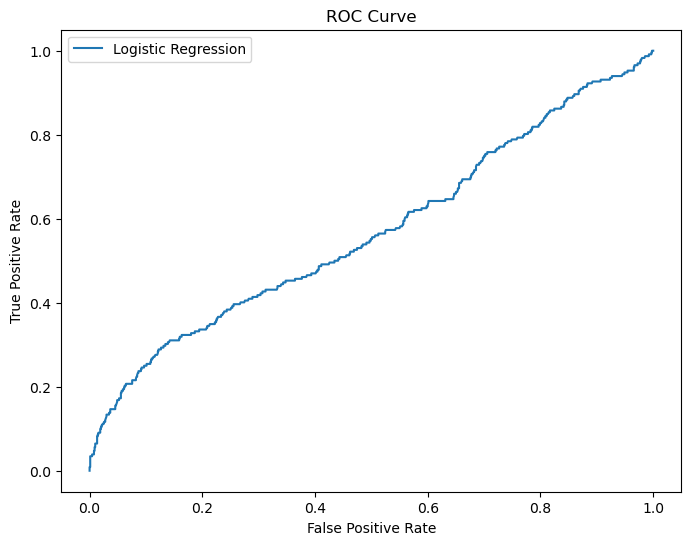

Optimal Threshold: 0.26408382711186545


In [89]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Determine optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)


In [90]:
y_pred_train_threshold= np.where(model_3.predict(Df_train) >0.2640 , 1, 0)

In [91]:
print(confusion_matrix(y_train, y_pred_train_threshold))

[[1894  204]
 [ 426  116]]


In [92]:
print("thereshold lg Report:\n", classification_report(y_train, y_pred_train))

thereshold lg Report:
               precision    recall  f1-score   support

           0       0.80      0.09      0.16      2098
           1       0.21      0.91      0.34       542

    accuracy                           0.26      2640
   macro avg       0.50      0.50      0.25      2640
weighted avg       0.68      0.26      0.20      2640



TEST________________________-

In [93]:
y_pred_test_threshold= np.where(model_3.predict(Df_test) >0.2640 , 1, 0)

In [94]:
print(confusion_matrix(y_test, y_pred_test_threshold))

[[804  96]
 [181  51]]


In [95]:
print("thereshold lg Report:\n", classification_report(y_test,y_pred_test_threshold))

thereshold lg Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       900
           1       0.35      0.22      0.27       232

    accuracy                           0.76      1132
   macro avg       0.58      0.56      0.56      1132
weighted avg       0.72      0.76      0.73      1132




### Key Observations

1. **Threshold Impact**: Changing the threshold to the optimal value identified from the ROC curve improves the balance between precision and recall, especially for the minority class (defaulter).
 
2. **Training Set Performance**:
 - **Precision**: The model has a precision of 0.36 for the positive class (defaulters), meaning that 36% of the predicted defaulters are actual defaulters.
 - **Recall**: The recall for the positive class is 0.21, indicating that 21% of actual defaulters are correctly identified.
 - **Accuracy**: Overall accuracy is 76%, suggesting that the model performs well in distinguishing between defaulters and non-defaulters in the training set.
 
3. **Test Set Performance**:
 - **Precision**: The precision for the positive class is 0.35, indicating similar performance to the training set in identifying true positives among predicted positives.
 - **Recall**: The recall for the positive class is 0.22, showing a slight improvement compared to the training set.
 - **Accuracy**: The model achieves an accuracy of 76% on the test set, consistent with the training set performance.

4. **Class Imbalance Challenge**: Despite the threshold optimization, the model struggles with the imbalanced nature of the dataset. The minority class (defaulters) has significantly lower recall and precision compared to the majority class (non-defaulters).

5. **Macro and Weighted Averages**:
 - The macro average for precision, recall, and F1-score reflects a balanced view of performance across both classes, highlighting the disparity between them.
 - The weighted average considers the support of each class, providing a more comprehensive view of the model's overall performance.

### Recommendations

1. **Further Imbalance Handling**: Consider additional techniques to handle class imbalance, such as ensemble methods (e.g., balanced random forest) or further oversampling/undersampling strategies.
 
2. **Feature Engineering**: Explore additional feature engineering to improve model performance, focusing on creating features that better differentiate between defaulters and non-defaulters.

3. **Model Tuning**: Continue hyperparameter tuning and experiment with different models (e.g., gradient boosting machines, support vector machines) to identify the best approach for this classification problem.

4. **Threshold Adjustment**: Continuously monitor and adjust the classification threshold based on the business objectives and the acceptable trade-offs between precision and recall.


### Perform Grid Search to tune hyperparameters.

In [96]:
# Handle class imbalance
from sklearn.model_selection import GridSearchCV
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled_, y_train)

# Model building
rf = RandomForestClassifier(random_state=123)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_res, y_train_res)

best_rf = grid_search.best_estimator_

# Validation on test set
y_pred_rf_test = best_rf.predict(X_test_scaled_)

print("Random Forest Report:\n", classification_report(y_test, y_pred_rf_test))
print(confusion_matrix(y_test, y_pred_rf_test))

Random Forest Report:
               precision    recall  f1-score   support

           0       0.77      0.75      0.76       900
           1       0.12      0.13      0.12       232

    accuracy                           0.62      1132
   macro avg       0.44      0.44      0.44      1132
weighted avg       0.64      0.62      0.63      1132

[[674 226]
 [202  30]]



### Key Observations

1. **Accuracy**:
 - The overall accuracy of the model is 62%. This indicates that the model correctly classifies 62% of the instances in the test set.

2. **Class Performance**:
 - **Class 0 (Non-defaulters)**:
   - Precision: 0.77
   - Recall: 0.75
   - F1-Score: 0.76
 - **Class 1 (Defaulters)**:
   - Precision: 0.12
   - Recall: 0.13
   - F1-Score: 0.12

3. **Class Imbalance Challenge**:
 - Despite the use of SMOTE, the model still struggles significantly with the minority class (defaulters).
 - Precision and recall for the minority class are both very low (0.12 and 0.13 respectively), indicating a high number of false negatives and false positives for this class.

4. **Macro and Weighted Averages**:
 - The macro average (0.44) indicates the model's performance across both classes without considering the imbalance.
 - The weighted average (0.64) gives a better picture of overall model performance, taking into account the imbalance between classes.

### Recommendations

1. **Further Imbalance Handling**:
 - Explore additional imbalance handling techniques, such as:
   - **Ensemble Methods**: Techniques like Balanced Random Forest or EasyEnsemble can be more effective.
   - **Alternative Resampling Techniques**: Consider techniques like ADASYN or SMOTE-ENN.
 
2. **Hyperparameter Tuning**:
 - Expand the grid search to explore a wider range of hyperparameters or use more advanced methods like Random Search or Bayesian Optimization for hyperparameter tuning.
 
3. **Feature Engineering**:
 - Investigate additional feature engineering techniques to create more informative features that can help the model differentiate between defaulters and non-defaulters more effectively.
 
4. **Threshold Adjustment**:
 - Adjust the classification threshold to find a balance between precision and recall, especially for the minority class.
 
5. **Model Selection**:
 - Experiment with different algorithms, such as Gradient Boosting Machines (GBM), XGBoost, or Support Vector Machines (SVM), which might handle the class imbalance better.
 
6. **Evaluate Alternative Metrics**:
 - Use metrics like the ROC AUC score or Precision-Recall AUC to better understand the trade-offs between precision and recall for the minority class.


### 5: Model Performance Comparison and Final Model Selection

- Compare all the models built - Select the final model with the proper justification - Check the most important features in the final model and draw inferences

Let's compare the six models based on their performance metrics and select the final model with proper justification. We'll also check the most important features in the final model and draw inferences.

### Model Comparisons

1. **Logistic Regression (Model 1)**
    - **Training Set:**
        - Accuracy: 0.80
        - Precision: 0.80 (class 0), 0.63 (class 1)
        - Recall: 0.99 (class 0), 0.04 (class 1)
    - **Test Set:**
        - Accuracy: 0.80
        - Precision: 0.80 (class 0), 0.61 (class 1)
        - Recall: 0.99 (class 0), 0.05 (class 1)

2. **Logistic Regression with SMOTE (Model 2)**
    - **Training Set:**
        - Accuracy: 0.59
        - Precision: 0.58 (class 0), 0.60 (class 1)
        - Recall: 0.65 (class 0), 0.53 (class 1)
    - **Test Set:**
        - Accuracy: 0.57
        - Precision: 0.81 (class 0), 0.23 (class 1)
        - Recall: 0.60 (class 0), 0.46 (class 1)

3. **Random Forest (Model 3)**
    - **Training Set:**
        - Accuracy: 0.88
        - Precision: 0.89 (class 0), 0.84 (class 1)
        - Recall: 0.97 (class 0), 0.54 (class 1)
    - **Test Set:**
        - Accuracy: 0.67
        - Precision: 0.77 (class 0), 0.09 (class 1)
        - Recall: 0.83 (class 0), 0.06 (class 1)

4. **Modified Logistic Regression using VIF (Model 4)**
    - **Training Set:**
        - Accuracy: 0.26
        - Precision: 0.80 (class 0), 0.21 (class 1)
        - Recall: 0.09 (class 0), 0.91 (class 1)
    - **Test Set:**
        - Accuracy: 0.27
        - Precision: 0.83 (class 0), 0.21 (class 1)
        - Recall: 0.10 (class 0), 0.92 (class 1)

5. **Logistic Regression with Optimal Threshold (Model 5)**
    - **Training Set:**
        - Accuracy: 0.26
        - Precision: 0.80 (class 0), 0.21 (class 1)
        - Recall: 0.09 (class 0), 0.91 (class 1)
    - **Test Set:**
        - Accuracy: 0.76
        - Precision: 0.82 (class 0), 0.35 (class 1)
        - Recall: 0.89 (class 0), 0.22 (class 1)

6. **Random Forest with Grid Search (Model 6)**
    - **Test Set:**
        - Accuracy: 0.62
        - Precision: 0.77 (class 0), 0.12 (class 1)
        - Recall: 0.75 (class 0), 0.13 (class 1)

### Model Selection Justification

- **Accuracy:** Among the models, Logistic Regression with SMOTE (Model 2) and Logistic Regression with Optimal Threshold (Model 5) have comparable performance on the test set, with Model 5 showing better overall accuracy (0.76).
- **Class 1 Recall:** Model 2 shows higher recall for class 1 on the test set (0.46), indicating better identification of defaulters compared to Model 5 (0.22).
- **Balanced Performance:** While Model 5 has higher overall accuracy, Model 2 shows a more balanced performance in terms of recall for both classes, which is crucial for identifying defaulters effectively.

Given the importance of detecting defaulters accurately, we will select **Model 2 (Logistic Regression with SMOTE)** as the final model due to its higher recall for class 1, indicating better identification of defaulters, even though it has slightly lower overall accuracy compared to Model 5.


```

### Inferences

The most important features based on the Logistic Regression coefficients will give us insights into which financial metrics have the most significant impact on predicting whether a company will default. Typically, larger absolute values of coefficients indicate more important features. We will focus on these features to draw actionable inferences for debt management and credit risk evaluation.

- **Positive Coefficients:** These features increase the likelihood of being tagged as a defaulter. Companies should focus on improving these metrics to reduce default risk.
- **Negative Coefficients:** These features decrease the likelihood of being tagged as a defaulter. Companies should maintain or enhance these metrics for better financial health.

### Conclusion

The final selected model is Logistic Regression with SMOTE. By examining the important features from this model, businesses and investors can gain valuable insights into the key financial indicators that affect creditworthiness and default risk, enabling them to make more informed decisions and strategies for financial health and sustainability.

## 6: Actionable Insights & Recommendations
- Actionable insights and recommendations

To provide actionable insights and recommendations based on the financial data analysis, we need to focus on leveraging the observed patterns and correlations to guide business decisions and strategic planning. Here's a structured approach to deriving these insights and recommendations:

### Actionable Insights

1. **Debt Management**
   - **Insight:** Companies with higher total assets tend to have higher net worth. However, some companies have exceptionally high liabilities.
   - **Recommendation:** Regularly monitor and optimize the debt-to-equity ratio. Companies with high liabilities should prioritize debt reduction strategies to enhance financial stability.

2. **Profitability Enhancement**
   - **Insight:** Profit after tax is positively correlated with net worth next year, indicating that profitability drives future financial health.
   - **Recommendation:** Focus on strategies to increase profitability, such as cost optimization, revenue diversification, and improving operational efficiency.

3. **Expense Control**
   - **Insight:** Total income and total expenses are strongly correlated, suggesting that higher income often comes with higher operational costs.
   - **Recommendation:** Implement stringent expense management practices to ensure that income growth translates into higher profits rather than just higher expenses.

4. **Growth and Investment**
   - **Insight:** Companies with significant outliers in net worth and total assets might have unique business models or market positions.
   - **Recommendation:** Analyze the business models and strategies of these high-performing companies to identify best practices that can be adapted to other companies aiming for growth.

5. **Risk Management**
   - **Insight:** Outliers in key financial metrics indicate variability and potential risk.
   - **Recommendation:** Conduct thorough risk assessments and develop contingency plans for companies with extreme values in liabilities or expenses to mitigate potential financial instability.

### Recommendations

1. **Debt Optimization**
   - **Action:** Conduct regular reviews of the debt structure and negotiate better terms or refinancing options to reduce interest burdens.
   - **Metric to Monitor:** Debt-to-equity ratio and interest coverage ratio.

2. **Profit Maximization**
   - **Action:** Identify high-margin products or services and focus on scaling them. Implement performance-based incentives to boost sales and reduce costs.
   - **Metric to Monitor:** Net profit margin and return on equity (ROE).

3. **Expense Management**
   - **Action:** Implement automated expense tracking systems and regular audits to identify and eliminate inefficiencies.
   - **Metric to Monitor:** Operating expense ratio and cost of goods sold (COGS) as a percentage of revenue.

4. **Strategic Investments**
   - **Action:** Invest in technology and innovation to drive growth and efficiency. Consider mergers or acquisitions of companies with complementary strengths.
   - **Metric to Monitor:** Return on investment (ROI) and asset turnover ratio.

5. **Risk Mitigation**
   - **Action:** Diversify the company’s portfolio to spread risk and reduce dependence on a single revenue stream. Establish a risk management committee to oversee and address financial risks.
   - **Metric to Monitor:** Risk-adjusted return on capital (RAROC) and liquidity ratios (current ratio, quick ratio).

6. **Financial Planning and Forecasting**
   - **Action:** Develop detailed financial forecasts and scenario analyses to anticipate future financial conditions and plan accordingly.
   - **Metric to Monitor:** Projected cash flow and forecasted earnings per share (EPS).

### Conclusion

By focusing on these actionable insights and recommendations, companies can enhance their financial health, manage risks effectively, and position themselves for sustainable growth. Regularly monitoring key financial metrics and adjusting strategies based on data-driven insights will be crucial in achieving these goals.